## **About Dataset**

Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Url: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset/data

Guide: https://www.kaggle.com/code/caesarmario/loan-prediction-w-various-ml-models#6.4-Naive-Bayes

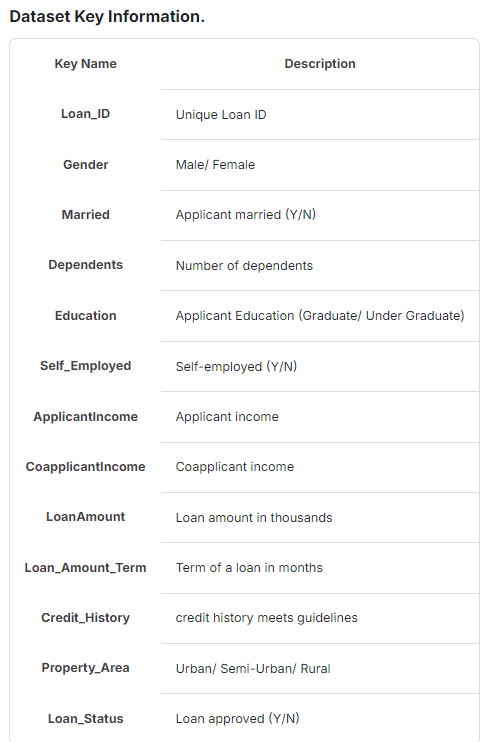

In [1]:
from prettytable import PrettyTable

# Initialize table
table = PrettyTable()

# Add column names
table.field_names = ['Key_name', 'Description', 'Type']

# Add rows of data
table.add_row(['Loan_ID', 'Unique Loan ID ex. LP001002', 'String'])
table.add_row(['Gender', 'Male/ Female', 'String'])
table.add_row(['Married', 'Applicant married (Y/N)', 'String'])
table.add_row(['Dependents', 'Number of dependents 0 / 1', 'String'])
table.add_row(['Education', 'Applicant Education (Graduate/ Under Graduate)', 'String'])
table.add_row(['Self_Employed', 'Self-employed (Y/N)', 'String'])
table.add_row(['ApplicantIncome', 'Applicant income', 'Int'])
table.add_row(['CoapplicantIncome', 'Coapplicant income', 'Float'])
table.add_row(['LoanAmount', 'Loan amount in thousands', 'Float'])
table.add_row(['Loan_Amount_Term', 'Term of a loan in months', 'Float'])
table.add_row(['Credit_History', 'Credit history meets guidelines', 'Float'])
table.add_row(['Property_Area', 'Urban/ Semi-Urban/ Rural', 'String'])
table.add_row(['Loan_Status', 'Loan approved (Y/N)', 'String'])

print(table)

+-------------------+------------------------------------------------+--------+
|      Key_name     |                  Description                   |  Type  |
+-------------------+------------------------------------------------+--------+
|      Loan_ID      |          Unique Loan ID ex. LP001002           | String |
|       Gender      |                  Male/ Female                  | String |
|      Married      |            Applicant married (Y/N)             | String |
|     Dependents    |           Number of dependents 0 / 1           | String |
|     Education     | Applicant Education (Graduate/ Under Graduate) | String |
|   Self_Employed   |              Self-employed (Y/N)               | String |
|  ApplicantIncome  |                Applicant income                |  Int   |
| CoapplicantIncome |               Coapplicant income               | Float  |
|     LoanAmount    |            Loan amount in thousands            | Float  |
|  Loan_Amount_Term |            Term of

**Objective**

1. Automate the loan eligibility process (real-time) after filling the online application form.
2. Identify a problem of the customer's segments (EDA)
3. Build various ML models that can predict loan approval (ML)

## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('C:\Prem\Projects\Python\Python test\dataset\loan-train.csv')

df_train.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\2556192457.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_train = pd.read_csv('C:\Prem\Projects\Python\Python test\dataset\loan-train.csv')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Reading Data Set**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
print('The number of columns:', df_train.shape[1])
print('The number of rows:', df_train.shape[0])

The number of columns: 13
The number of rows: 614


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## **Data Exploration**

### Categorical Variable

In [7]:
df_train['Credit_History'] = df_train['Credit_History'].astype('object')

In [8]:
cat_columns = df_train.select_dtypes(include= 'object')

cat_columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


1. Loan_ID

In [9]:
df_train.Loan_ID.value_counts()

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64

The Loan_ID column contains 614 unique ID values

* Gender	

In [10]:
print(df_train.Gender.value_counts(dropna= False))
print(df_train.Gender.value_counts(dropna= False, normalize=True)*100)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64
Gender
Male      79.641694
Female    18.241042
NaN        2.117264
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\1336254660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df_train, x= 'Gender', palette= 'cubehelix')


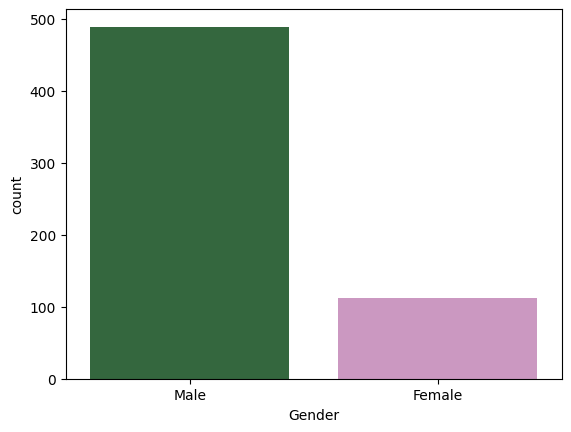

In [11]:
ax = sns.countplot(data= df_train, x= 'Gender', palette= 'cubehelix')

In [12]:
c_male = len(df_train[df_train['Gender'] == 'Male'])
c_female = len(df_train[df_train['Gender'] == 'Female'])
c_gnull = len(df_train[df_train['Gender'].isnull()])

print("Percentage of Male applicant: {:.2f}%".format((c_male / (len(df_train.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((c_female / (len(df_train.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((c_gnull / (len(df_train.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


⭐ The gender column shows that most applicants are male, with fewer female applicants. There are also some missing values in this column.

* Married

In [13]:
df_train['Married'].value_counts(dropna= False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\3106805998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Married', palette= 'cubehelix')


<Axes: xlabel='Married', ylabel='count'>

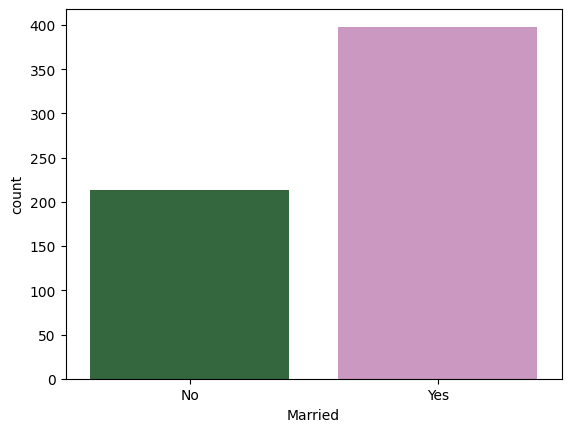

In [14]:
sns.countplot(data= df_train, x= 'Married', palette= 'cubehelix')

In [15]:
c_married = len(df_train[df_train['Married'] == 'Yes'])
c_single = len(df_train[df_train['Married'] == 'No'])
c_mnull = len(df_train[df_train['Married'].isnull()])

print("Percentage of Married: {:.2f}%".format((c_married / (len(df_train.Married))*100)))
print("Percentage of Single: {:.2f}%".format((c_single / (len(df_train.Married))*100)))
print("Missing values percentage: {:.2f}%".format((c_mnull / (len(df_train.Married))*100)))

Percentage of Married: 64.82%
Percentage of Single: 34.69%
Missing values percentage: 0.49%


⭐ The data shows that more individuals are married than single. There are also some missing values in the marital status column.

* Dependents

In [16]:
df_train['Dependents'].value_counts(dropna= False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\2157932918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Dependents', palette= 'cubehelix')


<Axes: xlabel='Dependents', ylabel='count'>

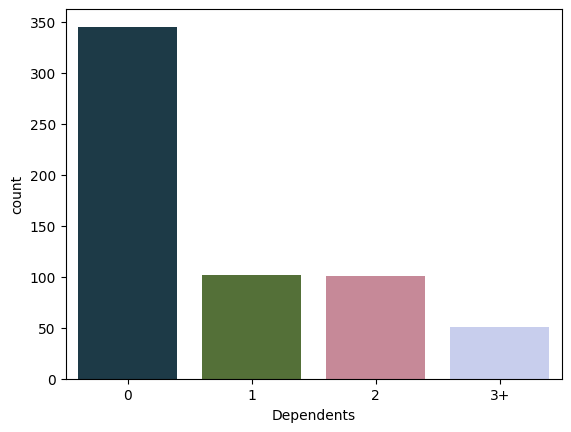

In [17]:
sns.countplot(data= df_train, x= 'Dependents', palette= 'cubehelix')

In [18]:
df_train['Dependents'].value_counts(dropna= False, normalize= True)*100

Dependents
0      56.188925
1      16.612378
2      16.449511
3+      8.306189
NaN     2.442997
Name: proportion, dtype: float64

⭐ Most applicants have no dependents, with fewer applicants having 1, 2, or 3+ dependents. There are some missing values.

* Education

In [19]:
print(df_train['Education'].value_counts(dropna= False))
print(df_train['Education'].value_counts(dropna= False, normalize= True)*100)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\1636698880.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Education', palette= 'cubehelix')


<Axes: xlabel='Education', ylabel='count'>

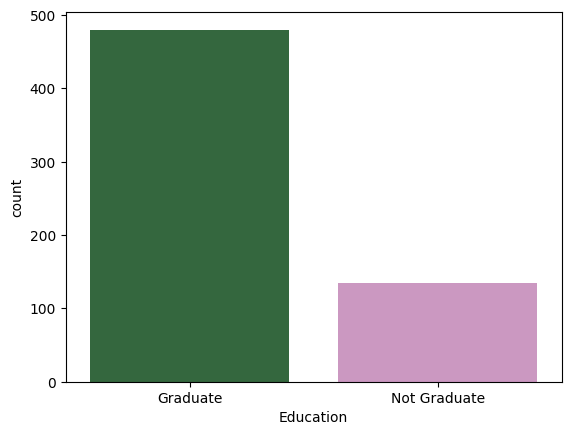

In [20]:
sns.countplot(data= df_train, x= 'Education', palette= 'cubehelix')

⭐ Most applicants have graduated, while fewer applicants have not. No missing values in this column.

* Self_Employed	

In [21]:
print(df_train['Self_Employed'].value_counts(dropna= False))
print(df_train['Self_Employed'].value_counts(dropna= False, normalize= True)*100)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64
Self_Employed
No     81.433225
Yes    13.355049
NaN     5.211726
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\4181210138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Self_Employed', palette= 'cubehelix')


<Axes: xlabel='Self_Employed', ylabel='count'>

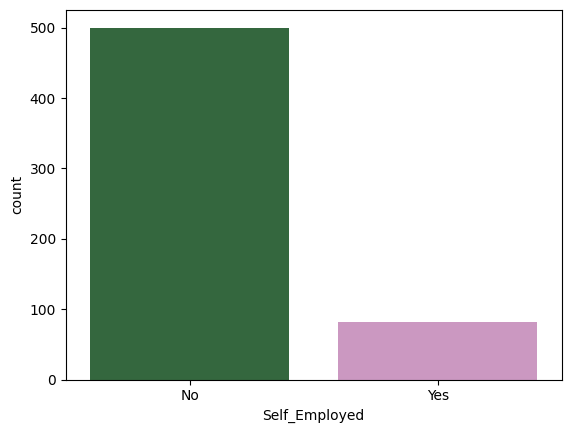

In [22]:
sns.countplot(data= df_train, x= 'Self_Employed', palette= 'cubehelix')

⭐ Most applicants are employees, with fewer being self-employed. There are some missing values in this colmun.

* Property_Area

In [23]:
print(df_train['Property_Area'].value_counts(dropna= False))
print(df_train['Property_Area'].value_counts(dropna= False, normalize= True)*100)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\4233574240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Property_Area', palette= 'cubehelix')


<Axes: xlabel='Property_Area', ylabel='count'>

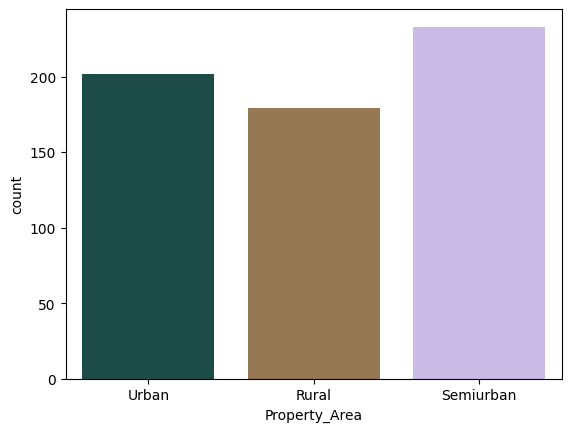

In [24]:
sns.countplot(data= df_train, x= 'Property_Area', palette= 'cubehelix')

⭐ Most applicants come from semi-urban areas, with fewer from urban and rural areas. However, the data is a balanced distribution.

* Loan_Status

In [25]:
print(df_train['Loan_Status'].value_counts(dropna= False))
print(df_train['Loan_Status'].value_counts(dropna= False, normalize= True)*100)

Loan_Status
Y    422
N    192
Name: count, dtype: int64
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\180504990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Loan_Status', palette= 'cubehelix')


<Axes: xlabel='Loan_Status', ylabel='count'>

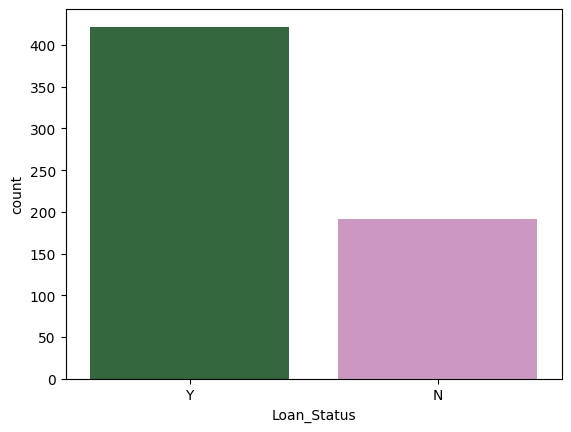

In [26]:
sns.countplot(data= df_train, x= 'Loan_Status', palette= 'cubehelix')

⭐ The number of approved loans is higher than rejected loans. 

* Credit_History

In [27]:
print(df_train['Credit_History'].value_counts(dropna= False))
print(df_train['Credit_History'].value_counts(dropna= False, normalize= True)*100)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64
Credit_History
1.0    77.361564
0.0    14.495114
NaN     8.143322
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\1621382697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Credit_History', palette= 'cubehelix')


<Axes: xlabel='Credit_History', ylabel='count'>

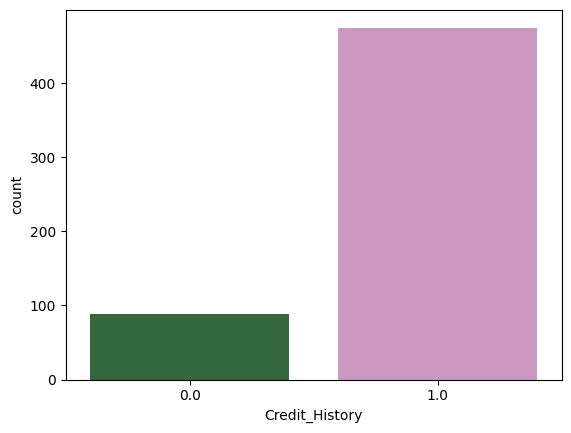

In [28]:
sns.countplot(data= df_train, x= 'Credit_History', palette= 'cubehelix')

⭐ Most applicants have a good credit history, with fewer being bad creidt history. There are some missing values in this colmun.

### Numerical Variable

In [29]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [30]:
num_columns = df_train.select_dtypes(include= 'number')

num_columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


* Loan_Amount_Term

In [31]:
print(df_train['Loan_Amount_Term'].value_counts(dropna= False))
print(df_train['Loan_Amount_Term'].value_counts(dropna= False, normalize= True)*100)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Loan_Amount_Term
360.0    83.387622
180.0     7.166124
480.0     2.442997
NaN       2.280130
300.0     2.117264
84.0      0.651466
240.0     0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: proportion, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\1958040840.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_train, x= 'Loan_Amount_Term', palette= 'cubehelix')


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

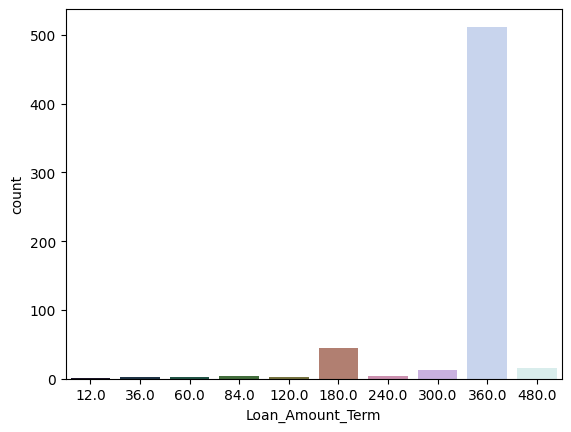

In [32]:
sns.countplot(data= df_train, x= 'Loan_Amount_Term', palette= 'cubehelix')

⭐ The dataset is likely representative of standard 30-year mortgages or other long-term loan products.

* ApplicantIncome

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

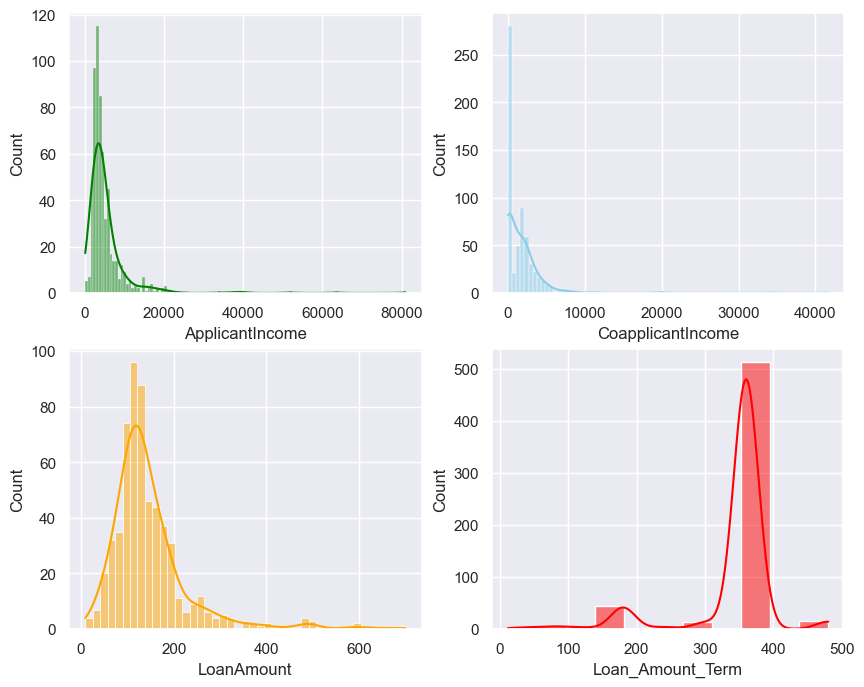

In [33]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_train, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_train, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_train, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_train, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red')

<Axes: xlabel='Loan_Amount_Term'>

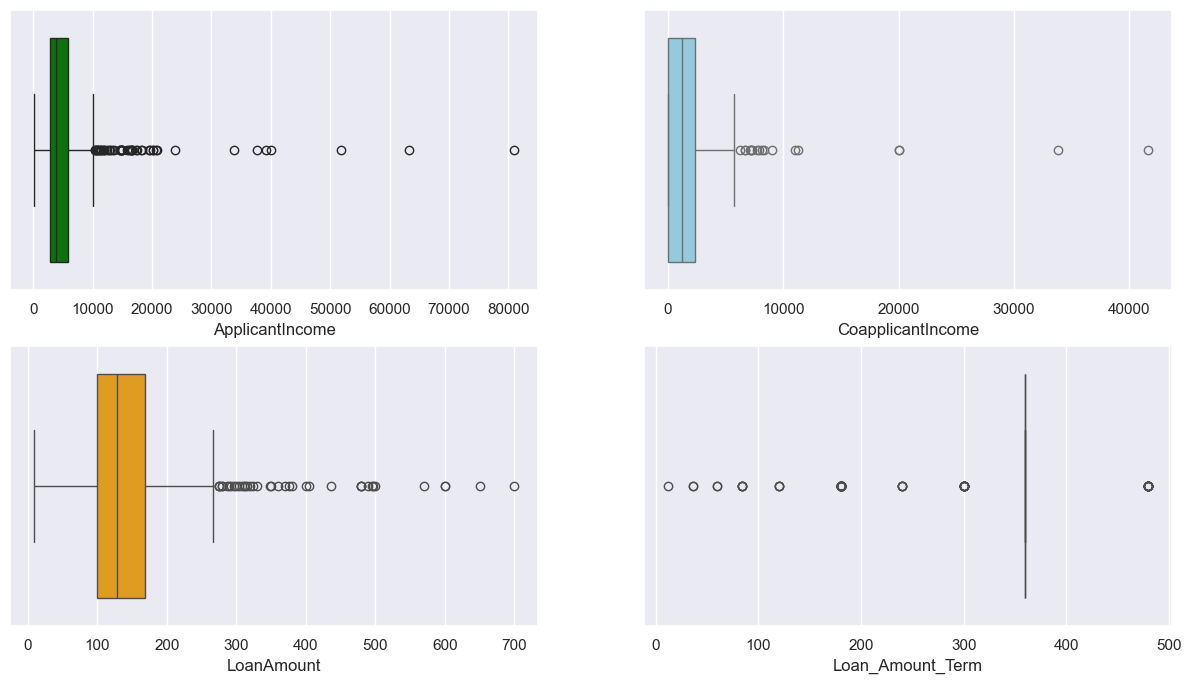

In [34]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.boxplot(data= df_train, x= 'ApplicantIncome', ax= axs[0, 0], color= 'green')
sns.boxplot(data= df_train, x= 'CoapplicantIncome', ax= axs[0, 1], color= 'skyblue')
sns.boxplot(data= df_train, x= 'LoanAmount', ax= axs[1, 0], color= 'orange')
sns.boxplot(data= df_train, x= 'Loan_Amount_Term', ax= axs[1, 1], color= 'red')

⭐ The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers.

### Bivariate analysis 

 * Heatmap
 * categorical & categorical
 * categroical & numerical
 * numerical & numerical

<Axes: >

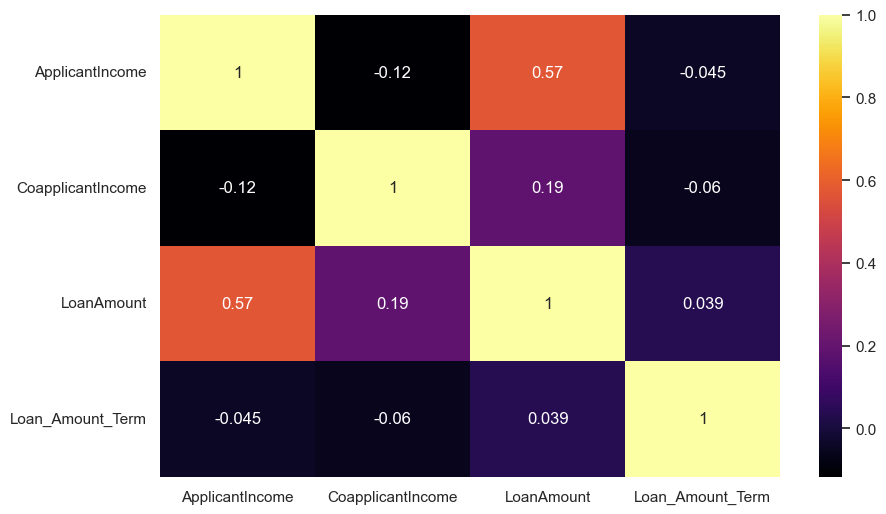

In [35]:

plt.figure(figsize= (10, 6))
sns.heatmap(data= num_columns.corr(), annot= True, cmap= 'inferno')

* ApplicantIncome and LoanAmount: These two variables have a strong positive correlation of 0.57. This indicates that as ApplicantIncome increases, LoanAmount tends to increase as well. This suggests that individuals with higher incomes are more likely to apply for larger loans.

* ApplicantIncome and Loan_Amount_Term: These two variables have a weak negative correlation of -0.045, represented by the light blue square. This suggests that individuals with higher incomes might tend to have slightly shorter loan terms, but this relationship is not very strong.

* ApplicantIncome and Co applicantIncome: These two variables have a weak negative correlation of -0.12. This means that there's a slight tendency for individuals with higher incomes to have lower-earning coapplicants. However, this relationship is not very strong.

* CoapplicantIncome and LoanAmount: These two variables have a moderate positive correlation of 0.19. This indicates that individuals with higher-earning coapplicants are more likely to apply for larger loans, but this relationship is not as strong as the one between ApplicantIncome and LoanAmount.

📣 Categorical 📊 - Categorical 📊

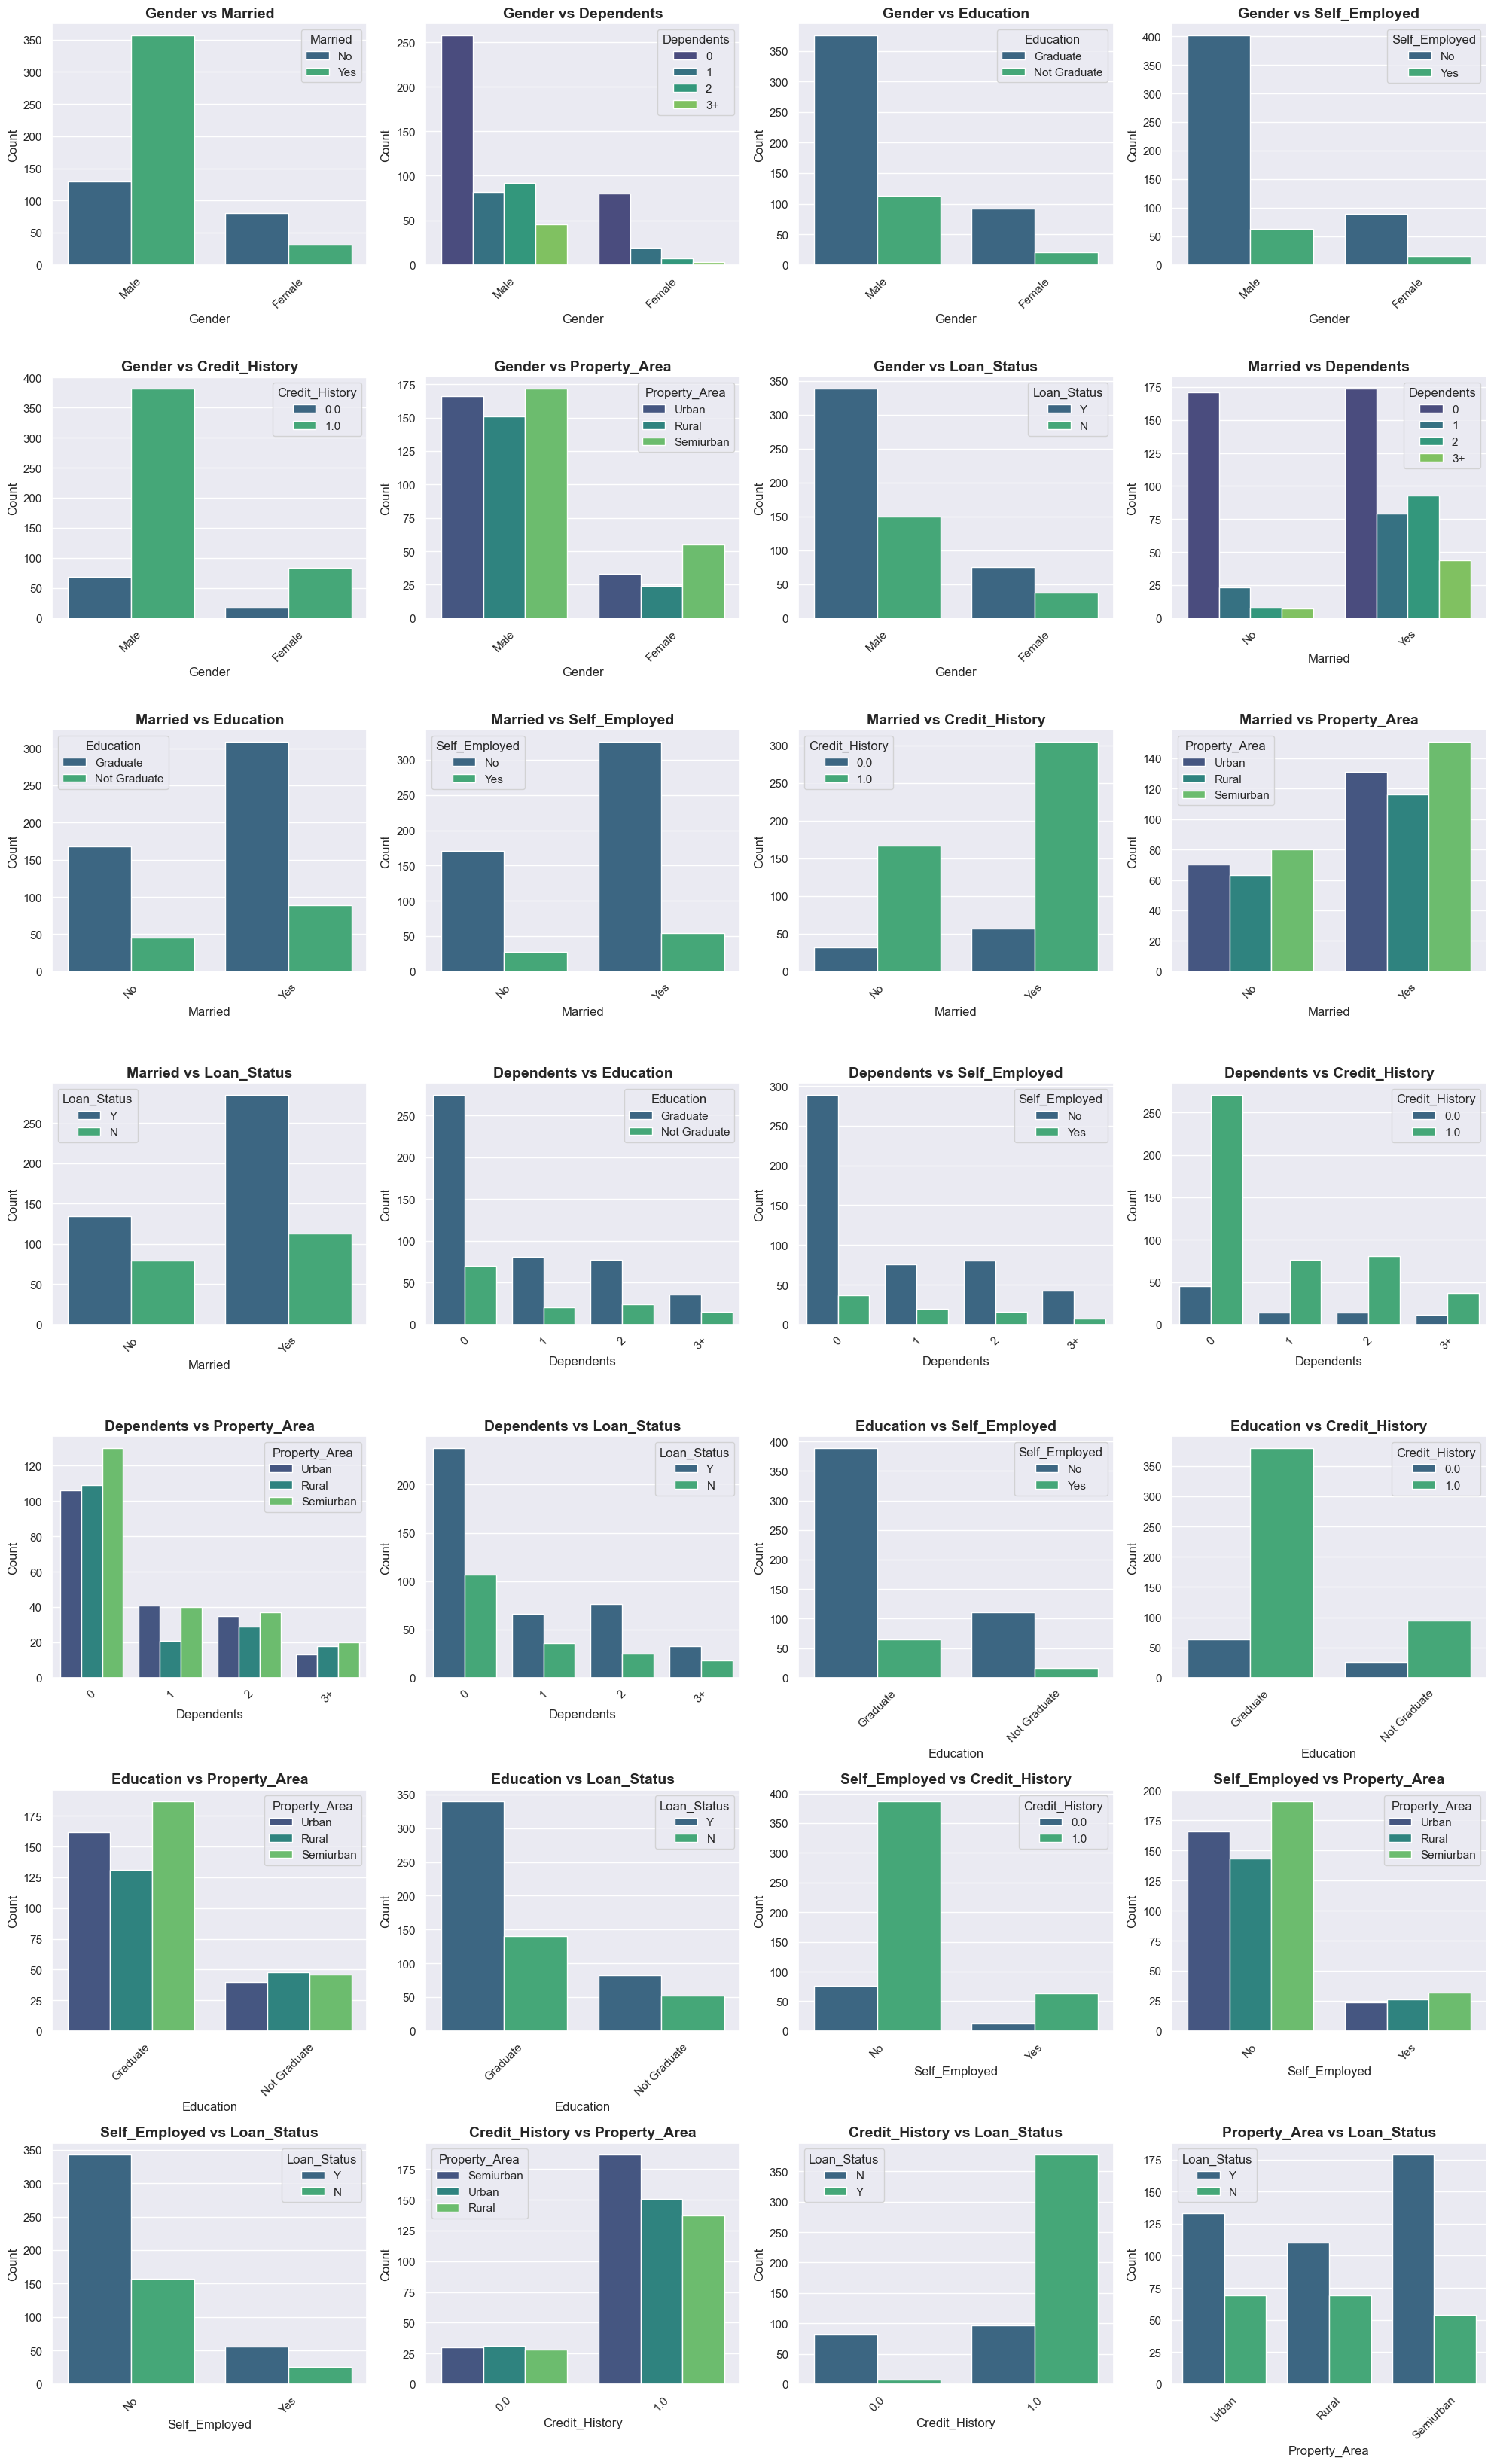

In [36]:
# Categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Calculate total number of pairs
num_pairs = len(categorical_columns) * (len(categorical_columns) - 1) // 2

# Set up the figure size according to the number of pairs
plt.figure(figsize=(20, 5 * num_pairs // 3))  # Adjust the height based on the number of pairs

pair_count = 1

# Loop through each pair of categorical columns
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns[i+1:]):
        plt.subplot((num_pairs + 2) // 3, 4, pair_count)  # Rows depend on the total number of pairs
        sns.countplot(data=df_train, x=col1, hue=col2, palette='viridis')
        plt.title(f'{col1} vs {col2}', fontsize=14, fontweight='bold')
        plt.xlabel(col1, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        
        pair_count += 1

plt.tight_layout()
plt.show()


Gender:


* Males significantly outnumber females in loan applications
* Most male applicants are married
* Males tend to have better credit history
* Males are more likely to be self-employed than females.


Marital Status:


* Have higher education levels
* Have better credit history
* Get more loan approvals
* Married people typically have 1-2 dependents


Education:


* Have good credit history
* Get more loan approvals
* Live in urban areas more frequently




Credit History:


* Those with good credit history have much higher loan approval rates
* There's a positive correlation between education and good credit history


Property Area:


* Fairly even distribution between urban, rural, and semi-urban areas
* Urban residents tend to get more loan approvals


Self-Employment:


* Majority are not self-employed
* Self-employed individuals tend to have lower loan approval rates


Dependents:


* Most applicants have 0-2 dependents
* Number of dependents has minimal impact on loan approval

In summary, the most influential factors for loan approval are:

* Good credit history
* Education level
* Marital status
* Urban residence

📣 Categorical 📊 - Numerical 📊

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\2009232511.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=cat_col, y=num_col, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\2009232511.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=cat_col, y=num_col, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\2009232511.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=cat_col, y=num_col, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykern

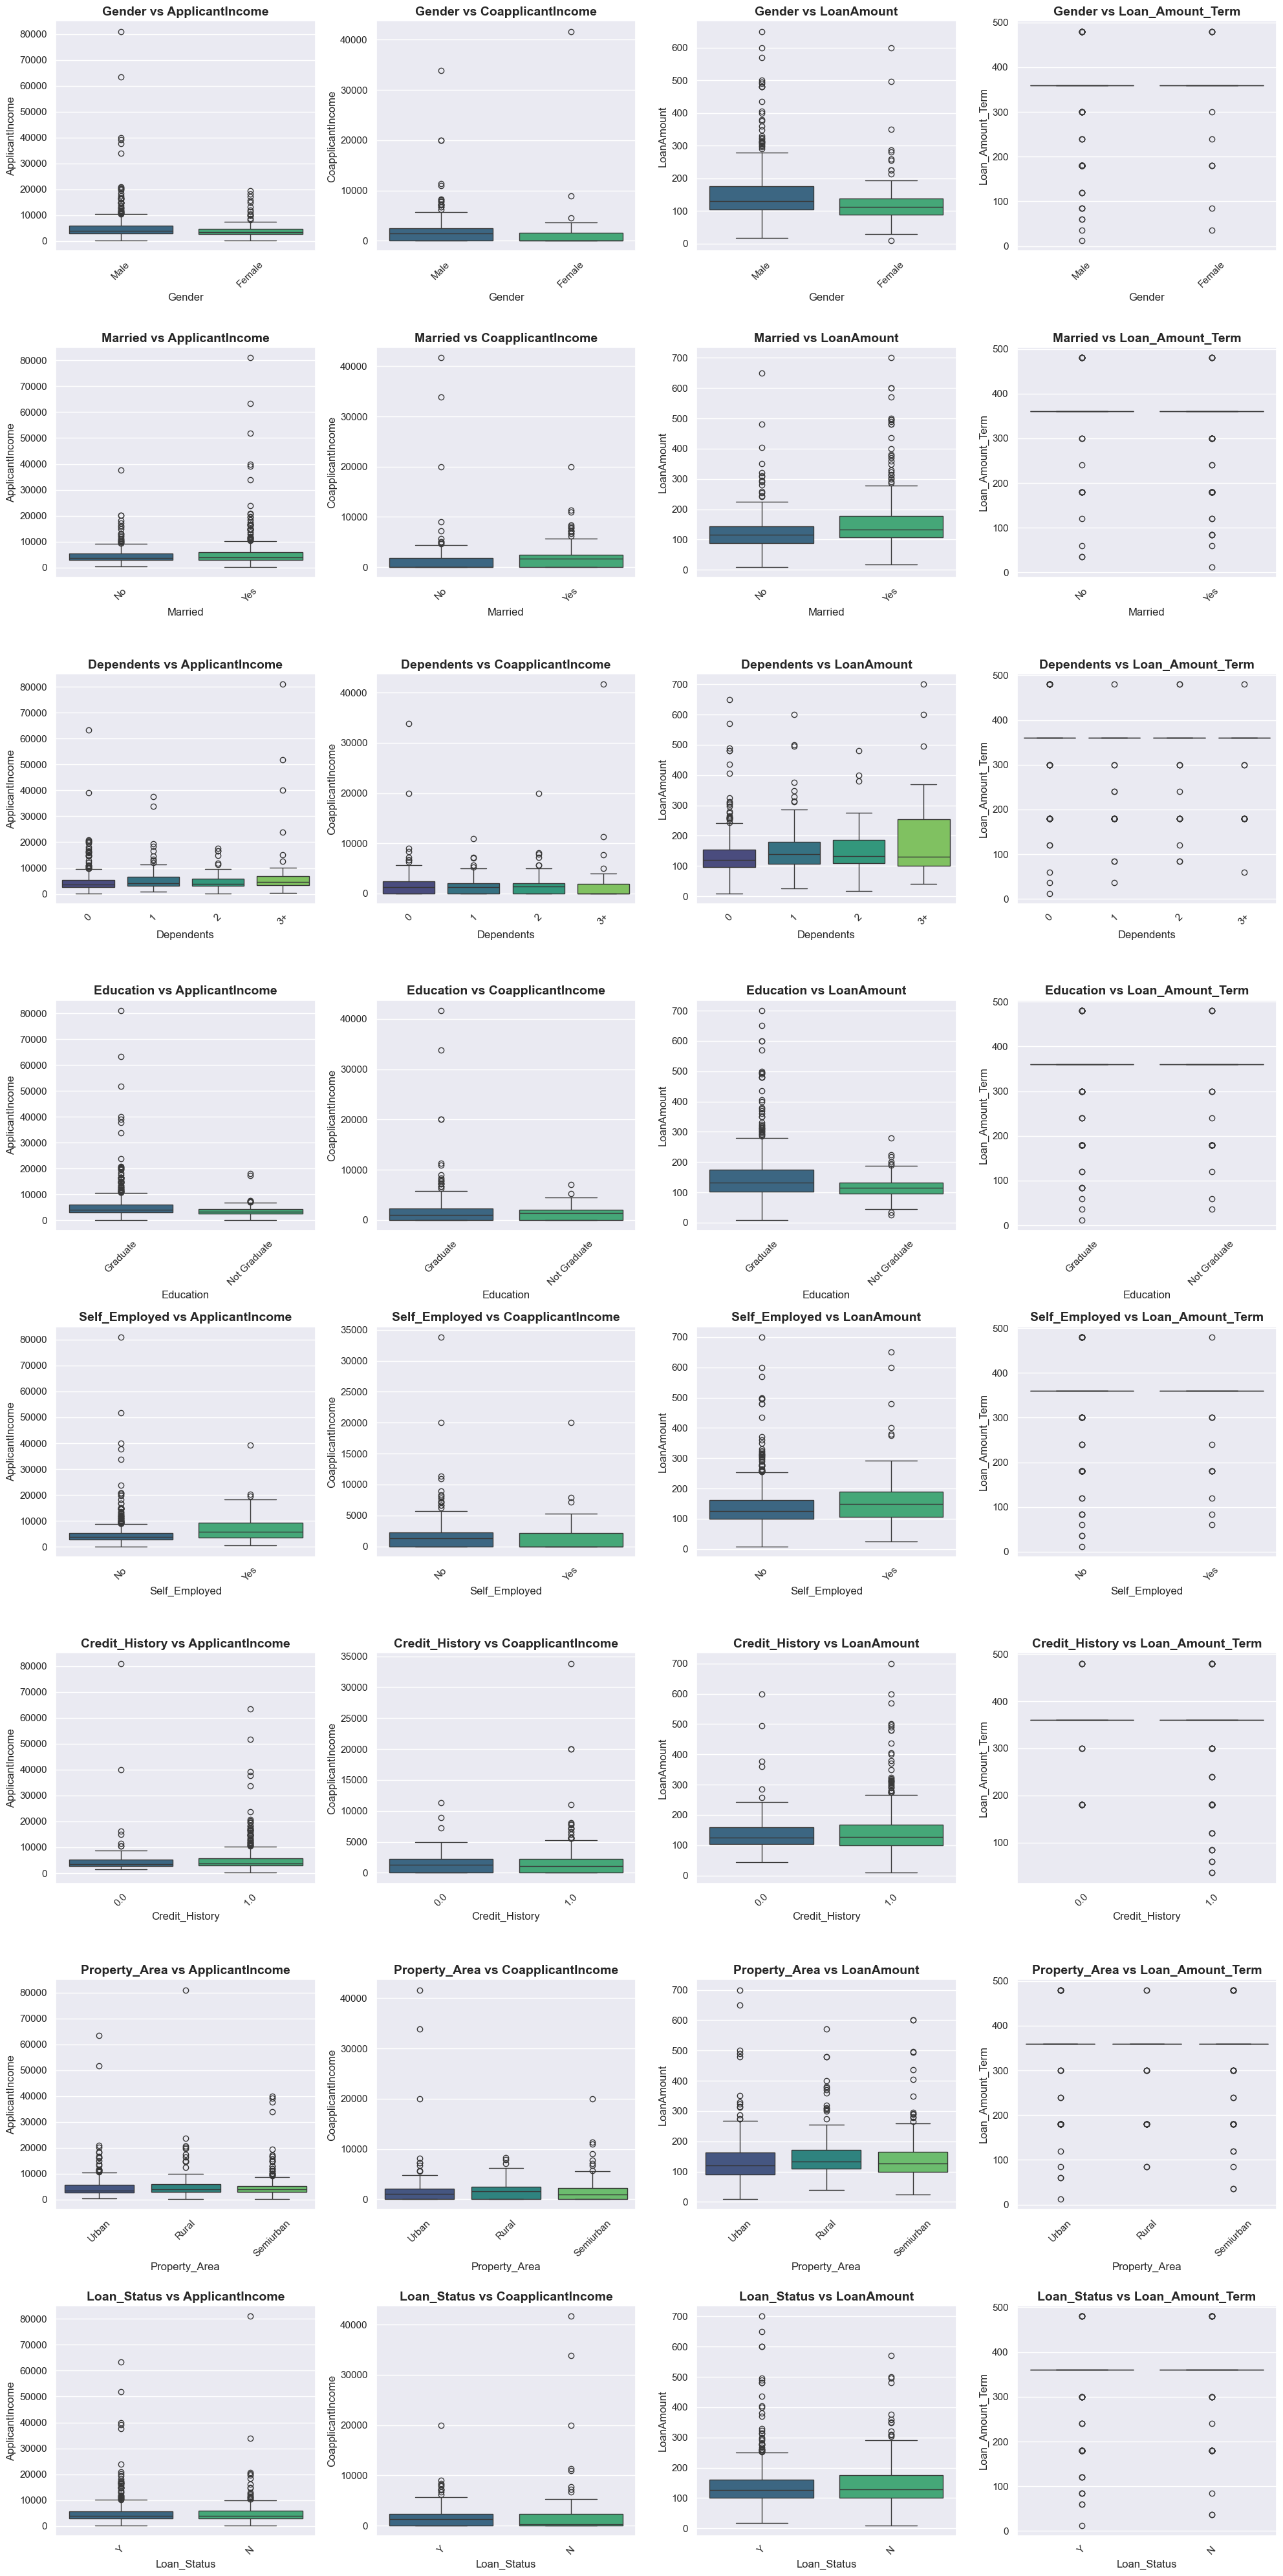

In [37]:
# Categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Numerical columns
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create subplots to visualize categorical vs numerical relationships
plt.figure(figsize=(20, 5 * len(categorical_columns)))  # Adjust the figure size based on the number of plots

plot_count = 1

# Loop through each categorical column and numerical column to create boxplots
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.subplot(len(categorical_columns), len(numeric_columns), plot_count)
        sns.boxplot(data=df_train, x=cat_col, y=num_col, palette='viridis')
        plt.title(f'{cat_col} vs {num_col}', fontsize=14, fontweight='bold')
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.xticks(rotation=45)
        
        plot_count += 1

plt.tight_layout()
plt.show()



Income Patterns:


* Applicant Income ranges mostly between 0-20,000 with some outliers up to 80,000
* Co-applicant Income typically lower than Applicant Income, mostly below 10,000
* Graduate education level tends to show higher income distributions

Loan Amount Patterns:


* Most loan amounts cluster between 100-300 units
* Strong outliers exist with some loans reaching up to 600-700 units
* Married applicants tend to get higher loan amounts

Loan Term Patterns:


* Most loan terms cluster around 360 months (30 years)

Education Impact:


* Graduates show higher median income
* Graduates tend to qualify for larger loan amounts
* Education level doesn't significantly affect loan term length

Self-Employment Effects:


* Self-employed individuals show more income variability
* Slightly higher median loan amounts for self-employed

Credit History Impact:


* Good credit history (1.0) associated with higher loan amounts
* Credit history doesn't significantly affect loan term length

Property Area Influence:


* While rural areas exhibit slightly higher average incomes and loan amounts, the overall differences between urban, semi-urban, and rural areas are relatively small.

Marriage Status Effect:


* Married applicants show higher combined incomes
* Married status associated with higher loan amounts

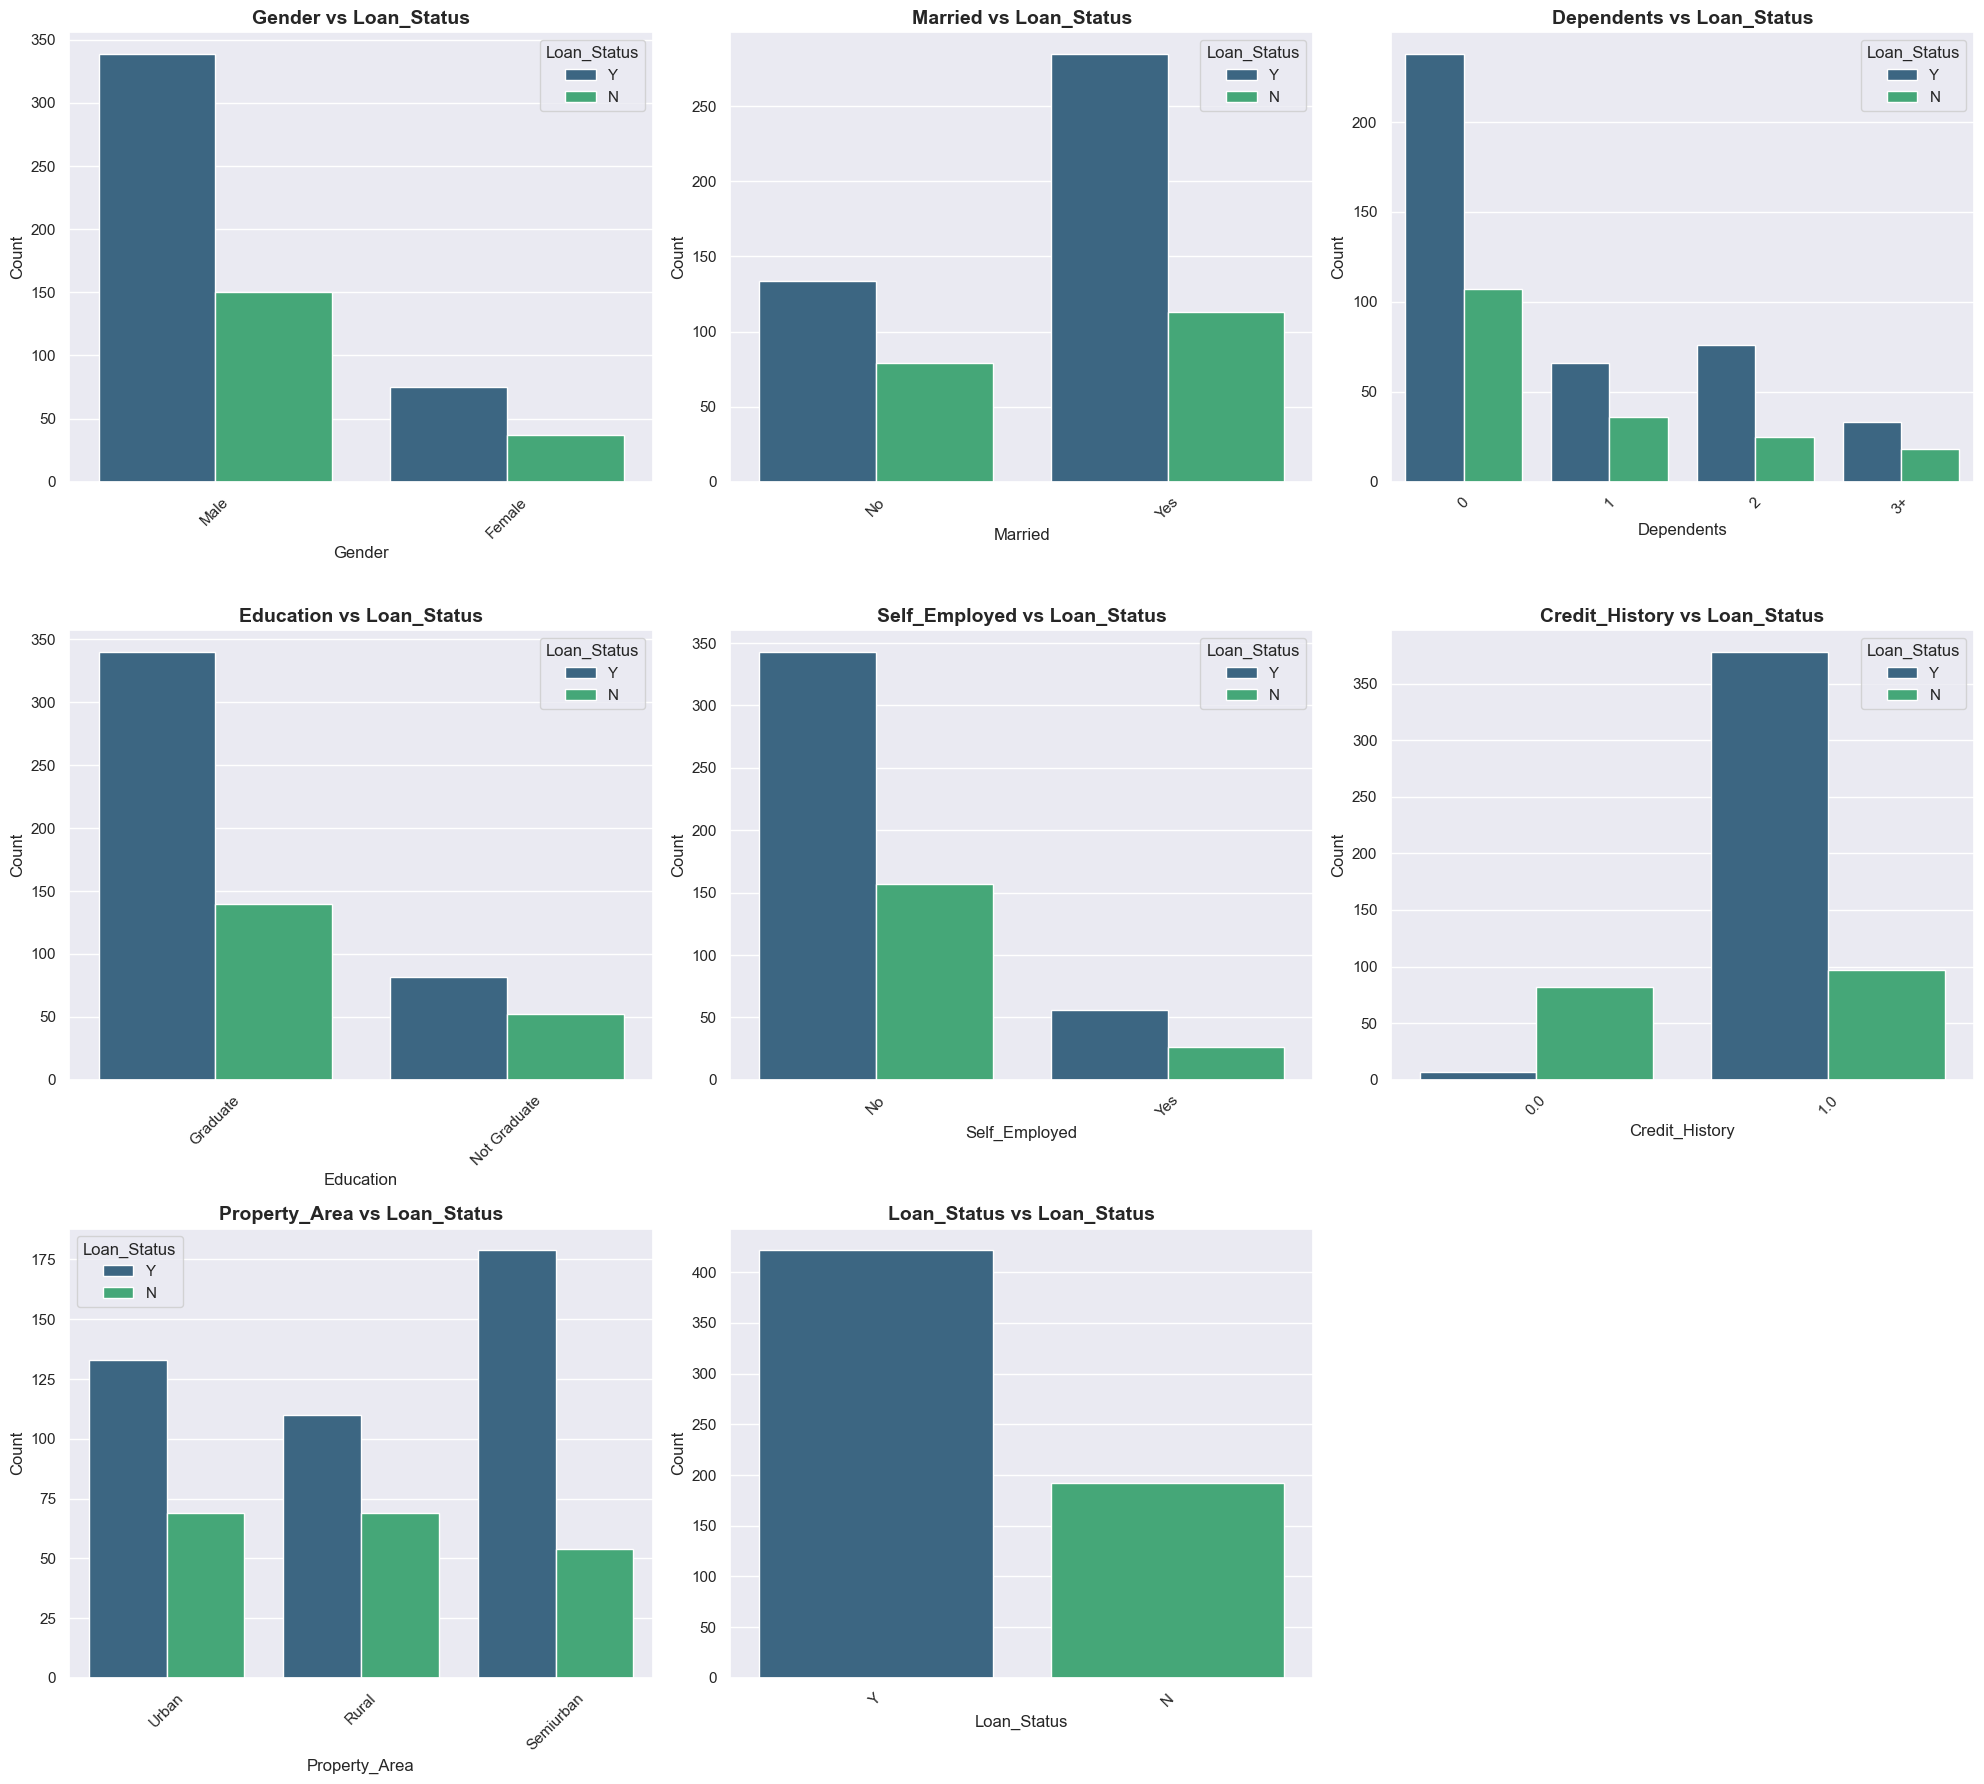

In [38]:
# Categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Calculate total number of pairs
num_pairs = len(categorical_columns)

# Set up the figure size according to the number of pairs
plt.figure(figsize=(20, 7 * num_pairs // 3))  # Adjust the height based on the number of pairs

pair_count = 1

# Loop through each categorical column
for col in categorical_columns:
    plt.subplot((num_pairs + 2) // 3, 3, pair_count)  # Adjust the layout for better visual representation
    sns.countplot(data=df_train, x=col, hue='Loan_Status', hue_order= ['Y', 'N'], palette='viridis')  # Use countplot for categorical data
    plt.title(f'{col} vs Loan_Status', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    
    pair_count += 1

plt.tight_layout()
plt.show()

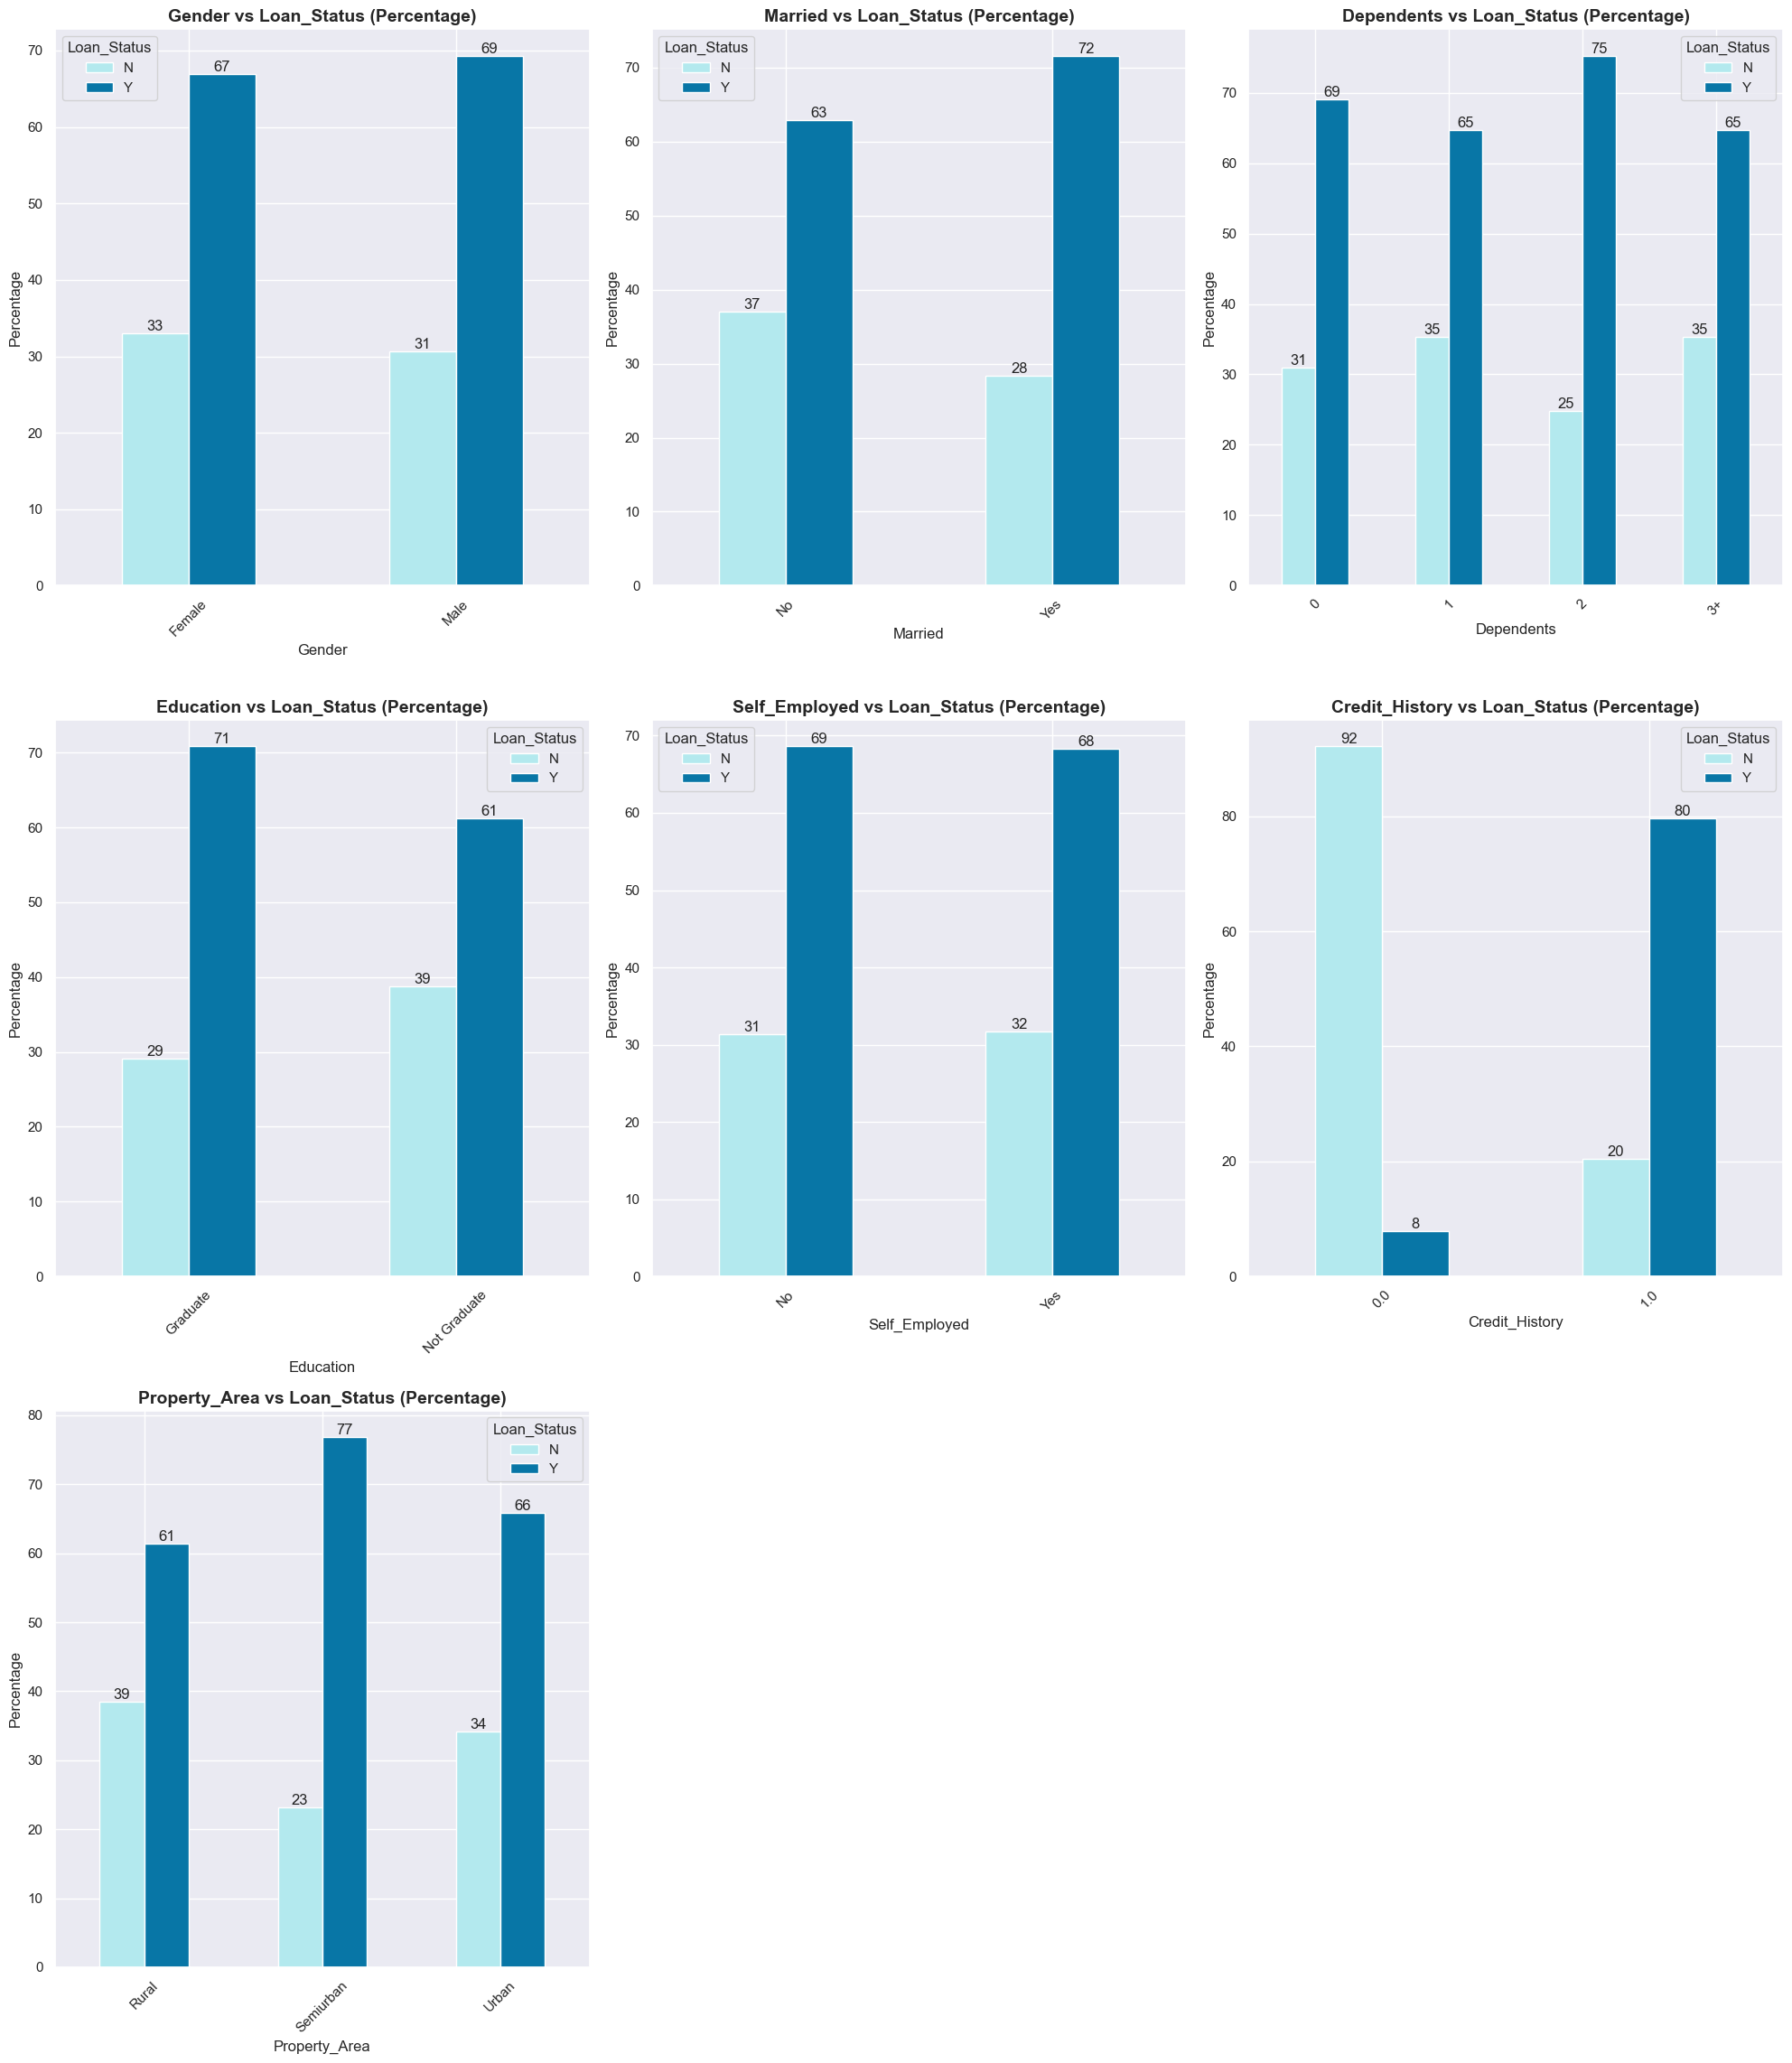

In [39]:
# Categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Credit_History', 'Property_Area']

# Calculate total number of pairs
num_pairs = len(categorical_columns)

# Set up the figure size according to the number of pairs
plt.figure(figsize=(20, 10 * num_pairs // 3))  # Adjust the height based on the number of pairs

pair_count = 1

# Loop through each categorical column
for col in categorical_columns:
    plt.subplot((num_pairs + 2) // 3, 3, pair_count)  # Adjust the layout for better visual representation
    
    # Calculate the percentage for each category in Loan_Status
    total = df_train.groupby([col, 'Loan_Status']).size().unstack().fillna(0)
    total_percentage = total.div(total.sum(axis=1), axis=0) * 100
    
    # Plot the percentages
    ax = total_percentage.plot(kind='bar', stacked=False, ax=plt.gca(), color=['#b3e9ee', '#0876a6']) 

    # Annotate each bar with the sales value
    for i in ax.containers:
        ax.bar_label(i, fmt='%.0f', label_type='edge')
    
    plt.title(f'{col} vs Loan_Status (Percentage)', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=45)
    
    pair_count += 1

plt.tight_layout()
plt.show()

📣 Numerical 📈 - Numerical 📈

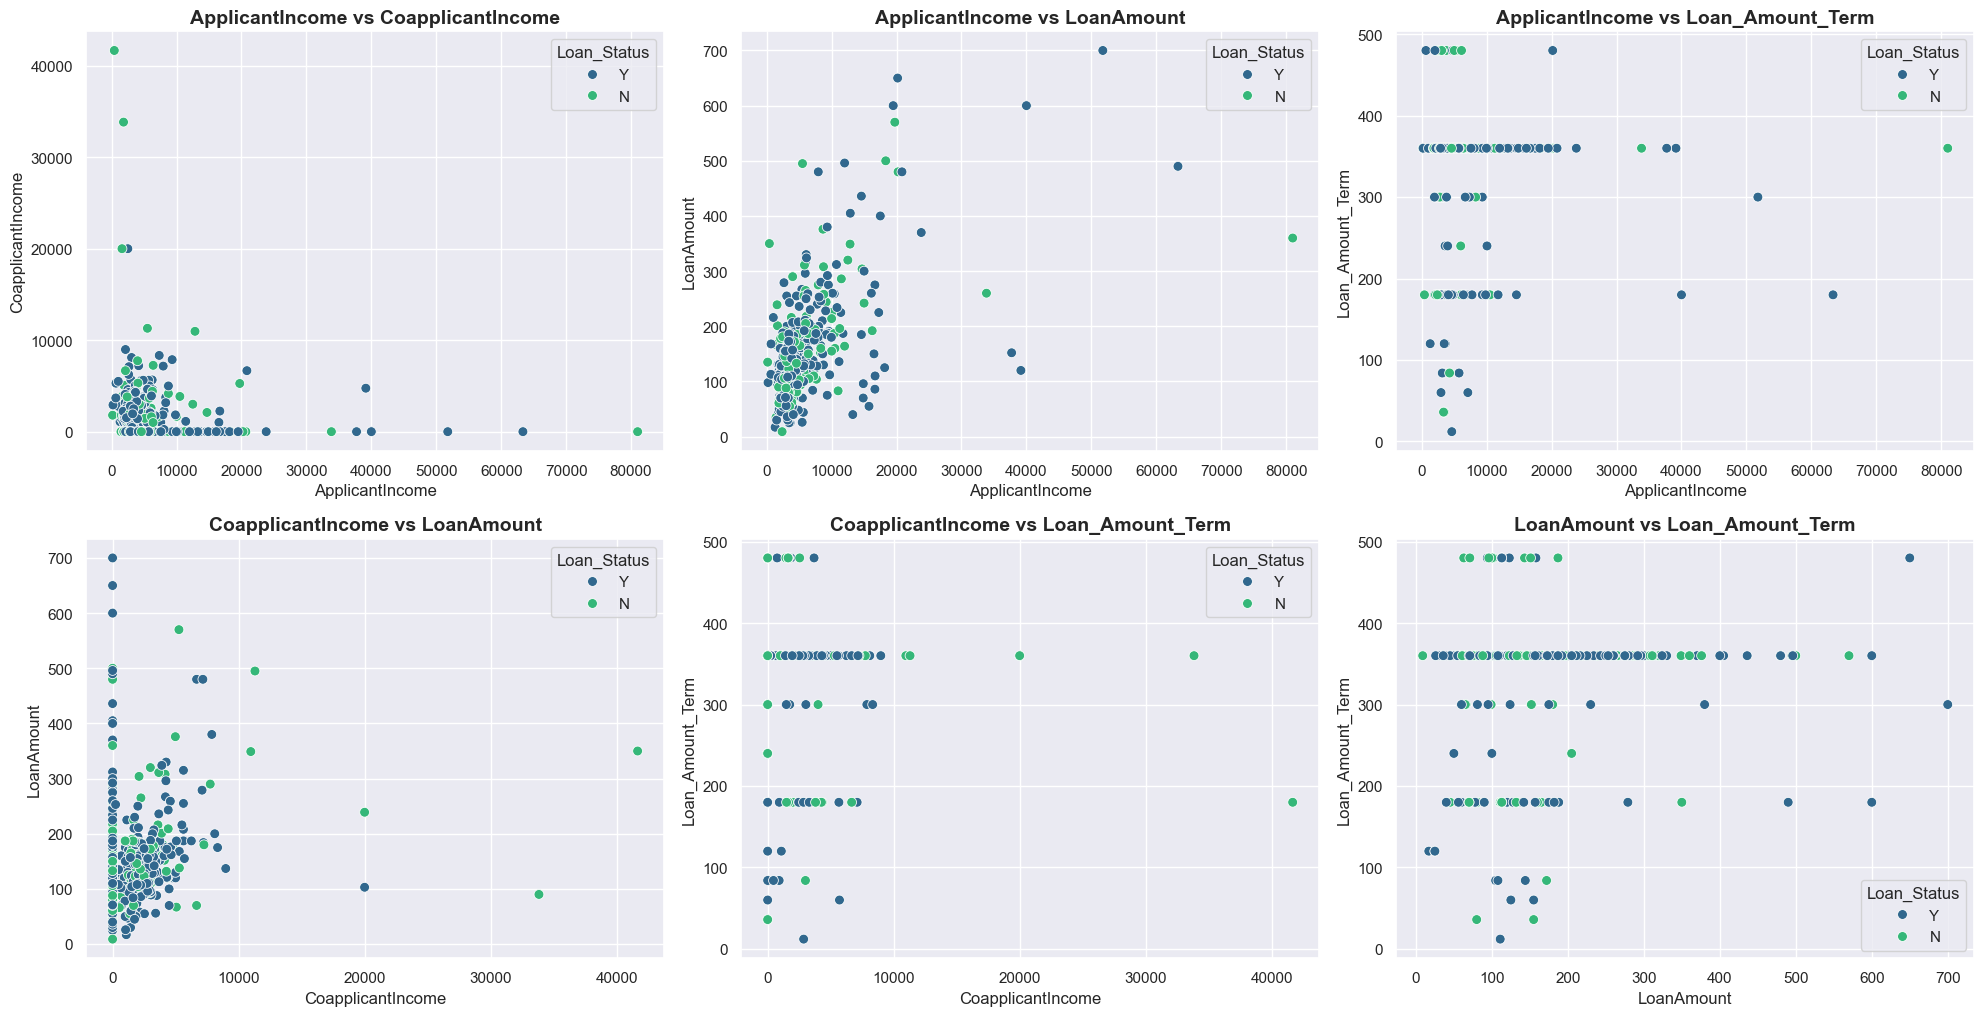

In [40]:
# Numerical columns
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create subplots for numerical vs numerical relationships
plt.figure(figsize=(20, 20))  # Adjust the figure size to fit all scatter plots

plot_count = 1

# Loop through pairs of numerical columns
for i, num_col1 in enumerate(numeric_columns):
    for num_col2 in numeric_columns[i+1:]:
        plt.subplot(len(numeric_columns), len(numeric_columns) - 1, plot_count)
        sns.scatterplot(data=df_train, x=num_col1, y=num_col2, hue='Loan_Status', palette='viridis', s=50)
        plt.title(f'{num_col1} vs {num_col2}', fontsize=14, fontweight='bold')
        plt.xlabel(num_col1, fontsize=12)
        plt.ylabel(num_col2, fontsize=12)
        
        plot_count += 1

plt.tight_layout()
plt.show()


* Null values

In [41]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

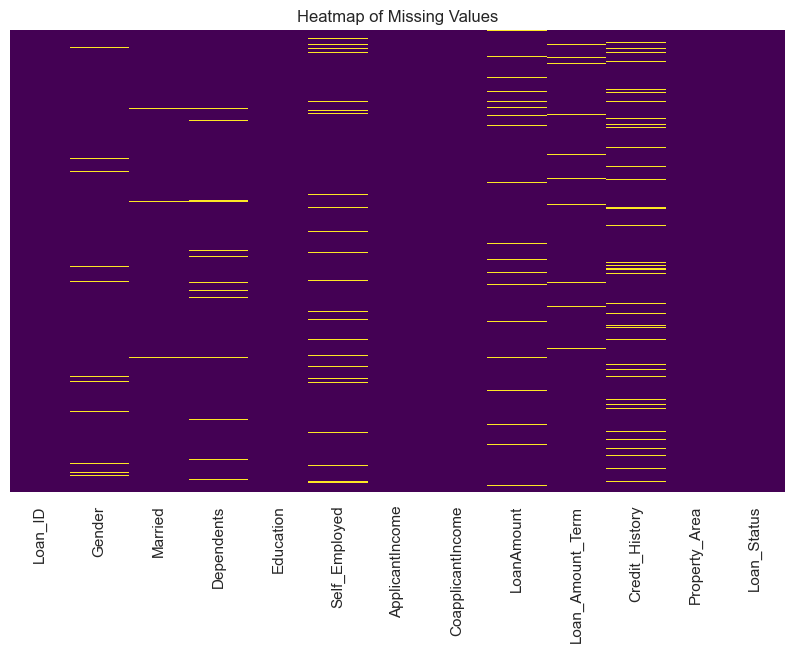

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

## **Data Preprocessing**

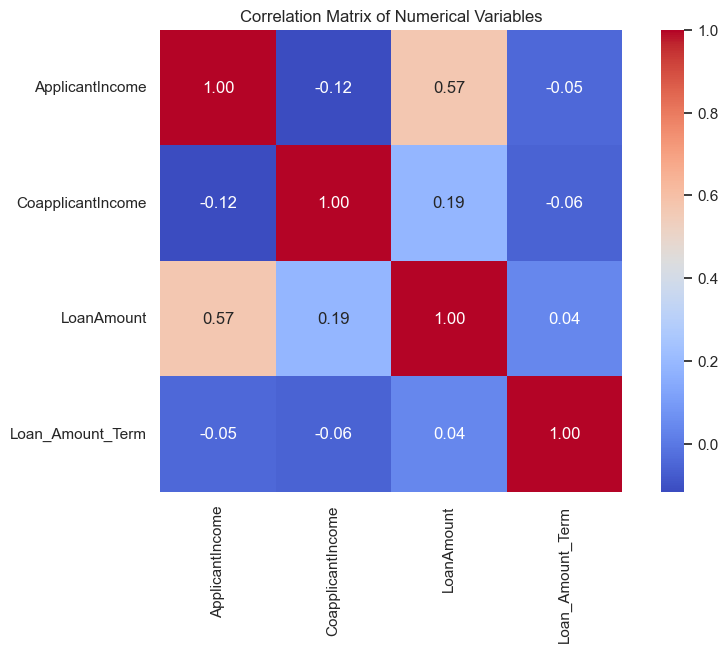

In [43]:
plt.figure(figsize= (10, 6))
sns.heatmap(data= num_columns.corr(), annot= True, cmap= 'coolwarm', fmt= ".2f", square= True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Drop unnecessary columns

In [44]:
df_train = df_train.drop(['Loan_ID'], axis= 1)

### Data Imputation => missing values

In [45]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

🚩 Categorical Variables 

In [46]:
cat_columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [47]:
cat_columns.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace= True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace= True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace= True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace= True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace= True)
df_train['Loan_Status'].fillna(df_train['Loan_Status'].mode()[0], inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\4222736469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\4222736469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

🚩Numerical Variables

In [49]:
num_columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [50]:
num_columns.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [51]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace= True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\3660226616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14600\3660226616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [52]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### One-hot Encoding 

This section will transform the catgorical columns into a form that suiatble for doing ML algorithms

In [53]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_model = df_train.copy()
df_model['Gender'] = lbl.fit_transform(df_model['Gender'])
df_model['Married'] = lbl.fit_transform(df_model['Married'])
df_model['Dependents'] = lbl.fit_transform(df_model['Dependents'])
df_model['Education'] = lbl.fit_transform(df_model['Education'])
df_model['Self_Employed'] = lbl.fit_transform(df_model['Self_Employed'])
df_model['Credit_History'] = lbl.fit_transform(df_model['Credit_History'])
df_model['Property_Area'] = lbl.fit_transform(df_model['Property_Area'])
df_model['Loan_Status'] = lbl.fit_transform(df_model['Loan_Status'])


In [54]:
df_model.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


### Remove Outliers & Infinite values

In [55]:
df_model

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


In [56]:
df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Amount_Term'>

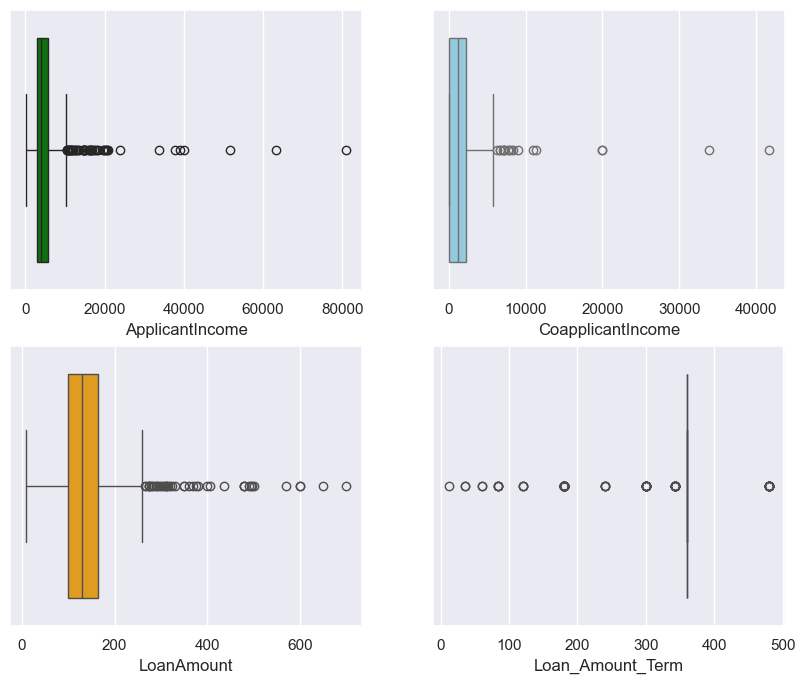

In [57]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df_model, x="ApplicantIncome", ax=axs[0, 0], color='green')
sns.boxplot(data=df_model, x="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=df_model, x="LoanAmount", ax=axs[1, 0], color='orange')
sns.boxplot(data=df_model, x="Loan_Amount_Term", ax=axs[1, 1], color='red')

In [58]:
# Specify the column for which you want to find outliers
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_model[(df_model[col] < lower_bound) | (df_model[col] > upper_bound)]

    # Count the number of outliers
    number_of_outliers = outliers.shape[0]

    # Count the total number of observations in the column
    total_count = df_model[col].count()

    # Calculate the percentage of outliers
    percentage_of_outliers = (number_of_outliers / total_count) * 100

    # Print the result
    print(f'Number of outliers in {col}: {number_of_outliers}')
    print(f'Percentage of outliers in {col}: {percentage_of_outliers:.2f}%')


Number of outliers in ApplicantIncome: 50
Percentage of outliers in ApplicantIncome: 8.14%
Number of outliers in CoapplicantIncome: 18
Percentage of outliers in CoapplicantIncome: 2.93%
Number of outliers in LoanAmount: 41
Percentage of outliers in LoanAmount: 6.68%
Number of outliers in Loan_Amount_Term: 102
Percentage of outliers in Loan_Amount_Term: 16.61%


I decided to do not drop the outlier because the data will get delete a lot.

In [59]:
from scipy.stats import mstats

# Winsorize age column, replacing values below the 5th and above the 95th percentiles
df_model['ApplicantIncome'] = mstats.winsorize(df_model['ApplicantIncome'], limits=[0.05, 0.05])
df_model['CoapplicantIncome'] = mstats.winsorize(df_model['CoapplicantIncome'], limits=[0.05, 0.05])
df_model['LoanAmount'] = mstats.winsorize(df_model['LoanAmount'], limits=[0.05, 0.05])
df_model['Loan_Amount_Term'] = mstats.winsorize(df_model['Loan_Amount_Term'], limits=[0.05, 0.05])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

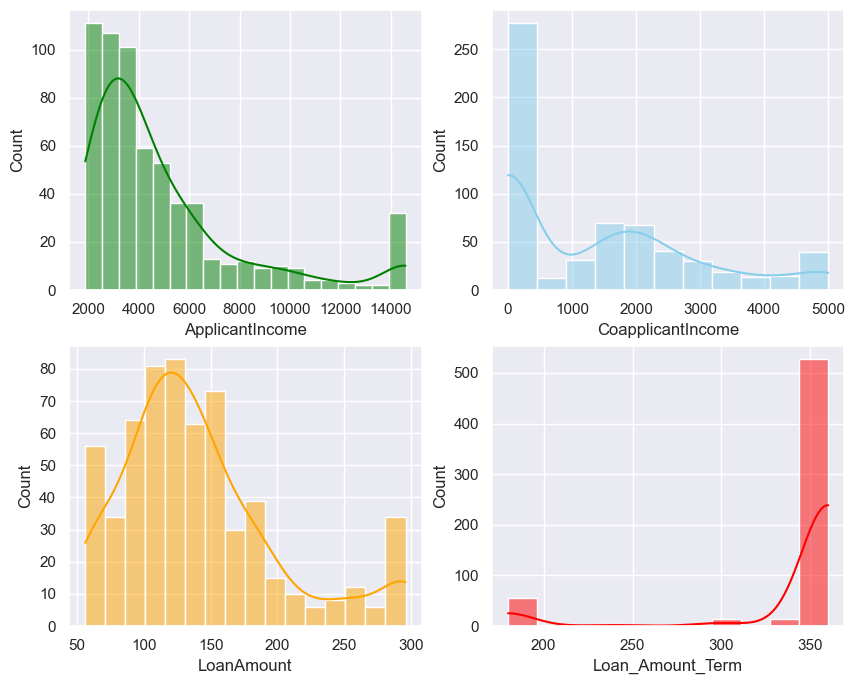

In [60]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red')

### Skewed Distribution Treatment

There are a lot of outlier in dataset, but I will use the square root compare with log method transformation to normalized the distribution

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

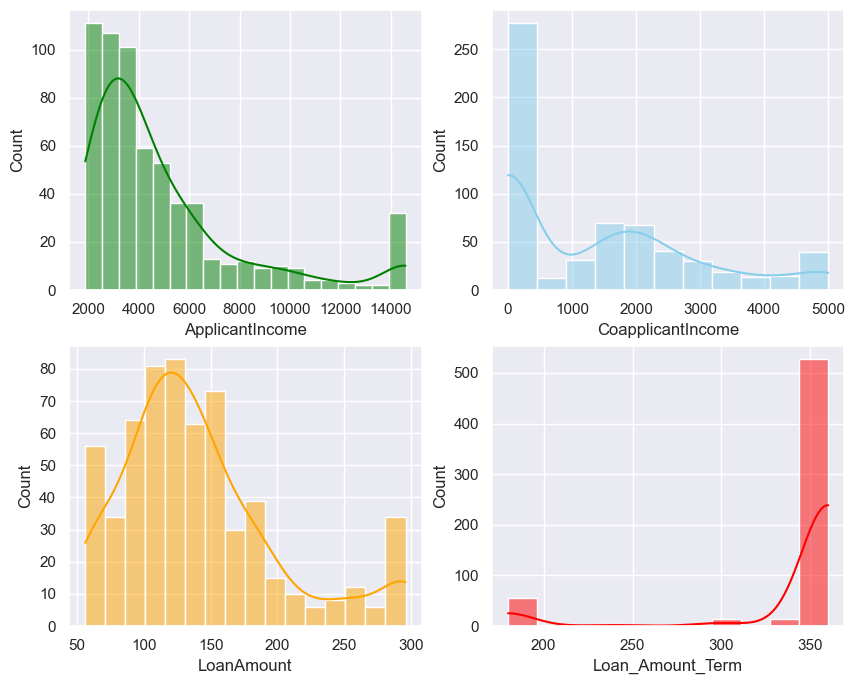

In [61]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red')

#### Square Root Transformation

In [62]:
df_model['ApplicantIncome_sqrt'] = np.sqrt(df_model.ApplicantIncome + 1)
df_model['CoapplicantIncome_sqrt'] = np.sqrt(df_model.CoapplicantIncome + 1)
df_model['LoanAmount_sqrt'] = np.sqrt(df_model.LoanAmount + 1)
df_model['Loan_Amount_Term_sqrt'] = np.sqrt(df_model.Loan_Amount_Term + 1)

In [63]:
df_model

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_sqrt,CoapplicantIncome_sqrt,LoanAmount_sqrt,Loan_Amount_Term_sqrt
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,76.485293,1.000000,12.141341,19.000000
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,67.705244,38.845849,11.357817,19.000000
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,54.781384,1.000000,8.185353,19.000000
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,50.833060,48.569538,11.000000,19.000000
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,77.466122,1.000000,11.916375,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,53.860932,1.000000,8.485281,19.000000
610,1,1,3,0,0,4106,0.0,56.000000,180.0,1,0,1,64.085880,1.000000,7.549834,13.453624
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,89.849875,15.524175,15.937377,19.000000
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,87.086164,1.000000,13.711309,19.000000


<Axes: xlabel='Loan_Amount_Term_sqrt', ylabel='Count'>

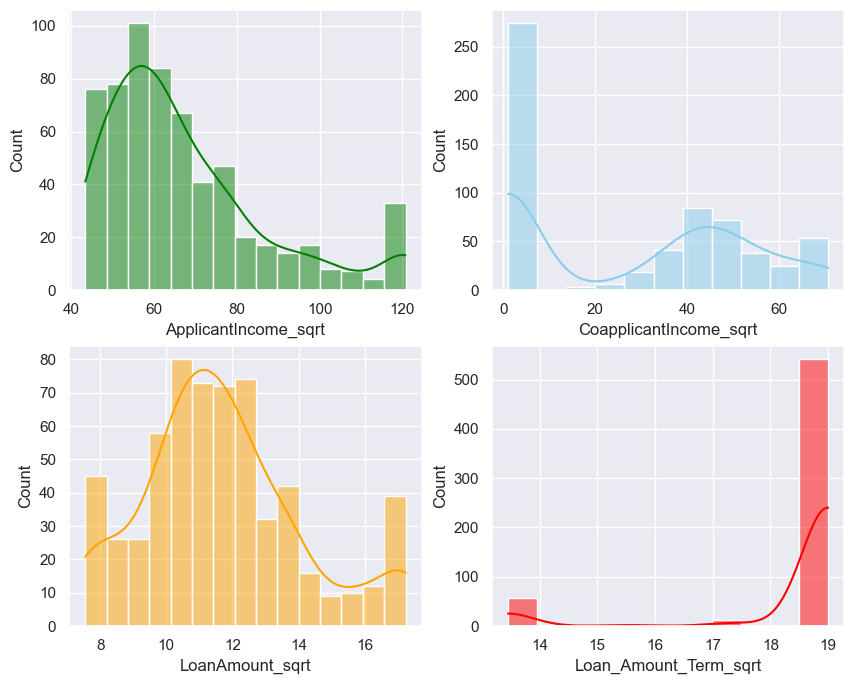

In [64]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome_sqrt", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome_sqrt", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount_sqrt", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term_sqrt", kde=True, ax=axs[1, 1], color='red')

#### Log Transformation

In [65]:
df_model['ApplicantIncome_log'] = np.log(df_model.ApplicantIncome + 1)
df_model['CoapplicantIncome_log'] = np.log(df_model.CoapplicantIncome + 1)
df_model['LoanAmount_log'] = np.log(df_model.LoanAmount + 1)
df_model['Loan_Amount_Term_log'] = np.log(df_model.Loan_Amount_Term + 1)

In [66]:
df_model

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_sqrt,CoapplicantIncome_sqrt,LoanAmount_sqrt,Loan_Amount_Term_sqrt,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,76.485293,1.000000,12.141341,19.000000,8.674197,0.000000,4.993232,5.888878
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,67.705244,38.845849,11.357817,19.000000,8.430327,7.319202,4.859812,5.888878
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,54.781384,1.000000,8.185353,19.000000,8.006701,0.000000,4.204693,5.888878
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,50.833060,48.569538,11.000000,19.000000,7.857094,7.765993,4.795791,5.888878
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,77.466122,1.000000,11.916375,19.000000,8.699681,0.000000,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,53.860932,1.000000,8.485281,19.000000,7.972811,0.000000,4.276666,5.888878
610,1,1,3,0,0,4106,0.0,56.000000,180.0,1,0,1,64.085880,1.000000,7.549834,13.453624,8.320448,0.000000,4.043051,5.198497
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,89.849875,15.524175,15.937377,19.000000,8.996280,5.484797,5.537334,5.888878
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,87.086164,1.000000,13.711309,19.000000,8.933796,0.000000,5.236442,5.888878


<Axes: xlabel='Loan_Amount_Term_log', ylabel='Count'>

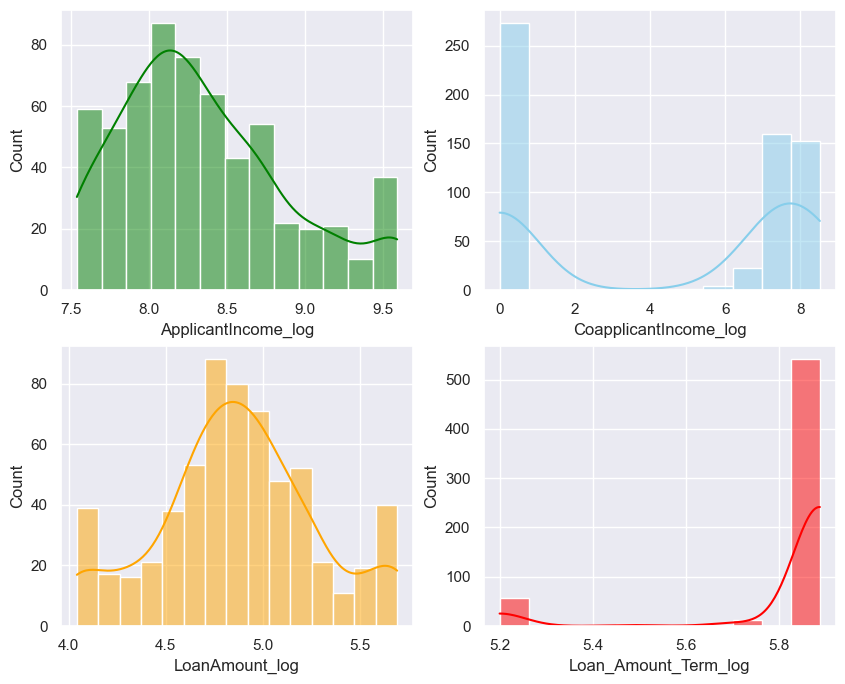

In [67]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome_log", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome_log", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount_log", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term_log", kde=True, ax=axs[1, 1], color='red')

#### Z-Score

In [68]:
from sklearn import preprocessing

# Standardizing the data
df_model['ApplicantIncome_en'] = preprocessing.scale(df_model['ApplicantIncome'])
df_model['CoapplicantIncome_en'] = preprocessing.scale(df_model['CoapplicantIncome'])
df_model['LoanAmount_en'] = preprocessing.scale(df_model['LoanAmount'])
df_model['Loan_Amount_Term_en'] = preprocessing.scale(df_model['Loan_Amount_Term'])

<Axes: xlabel='Loan_Amount_Term_en', ylabel='Count'>

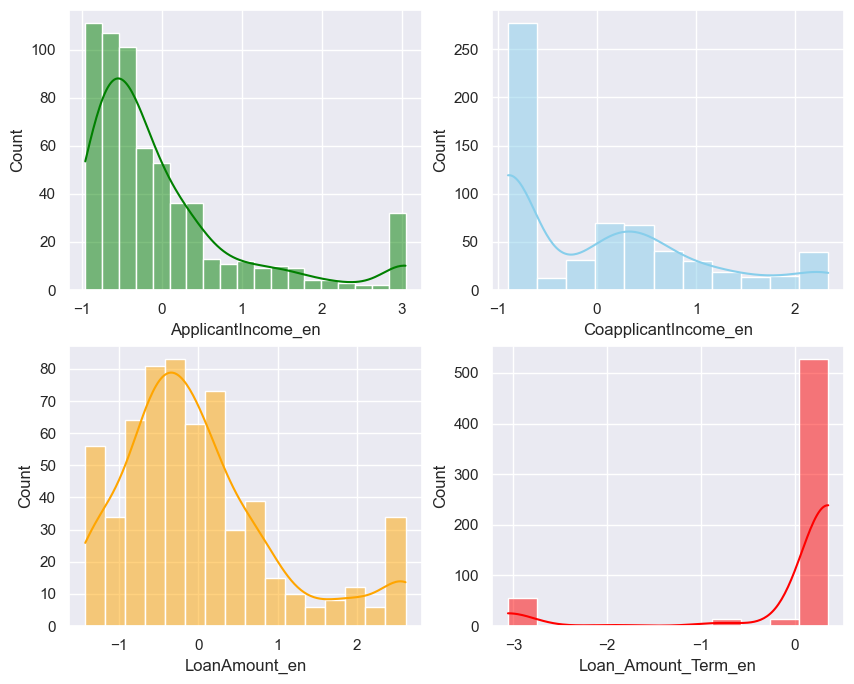

In [69]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome_en", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome_en", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount_en", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term_en", kde=True, ax=axs[1, 1], color='red')

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_model['ApplicantIncome_scaled'] = scaler.fit_transform(df_model[['ApplicantIncome']])
df_model['CoapplicantIncome_scaled'] = scaler.fit_transform(df_model[['CoapplicantIncome']])
df_model['LoanAmount_scaled'] = scaler.fit_transform(df_model[['LoanAmount']])
df_model['Loan_Amount_Term_scaled'] = scaler.fit_transform(df_model[['Loan_Amount_Term']])

<Axes: xlabel='Loan_Amount_Term_scaled', ylabel='Count'>

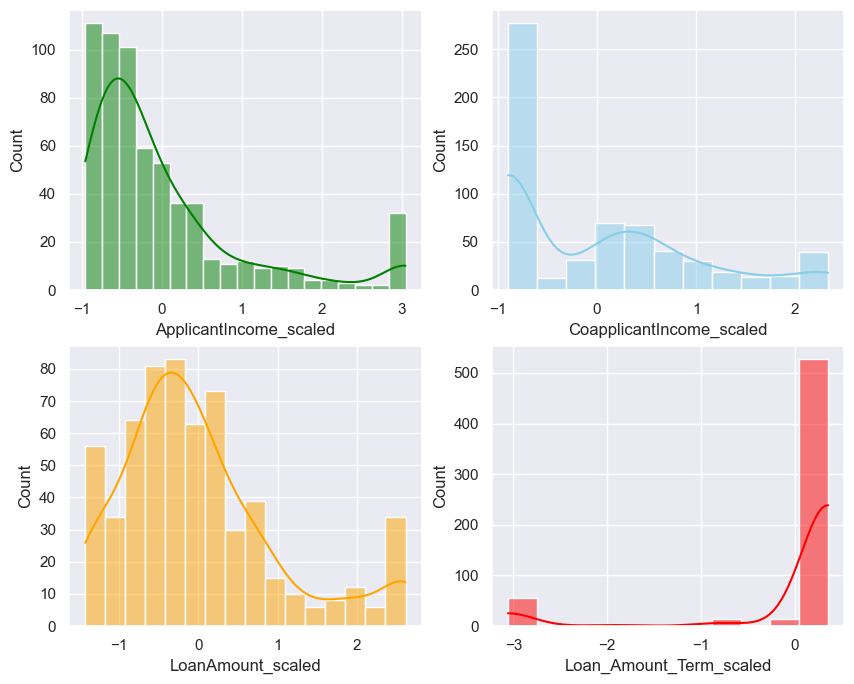

In [71]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome_scaled", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome_scaled", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount_scaled", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term_scaled", kde=True, ax=axs[1, 1], color='red')

#### Box-Cox

In [72]:
from scipy import stats
df_model['ApplicantIncome_boxcox'], _ = stats.boxcox(df_model['ApplicantIncome'] + 1)
df_model['CoapplicantIncome_boxcox'], _ = stats.boxcox(df_model['CoapplicantIncome'] + 1)
df_model['LoanAmount_boxcox'], _ = stats.boxcox(df_model['LoanAmount'] + 1)
df_model['Loan_Amount_Term_boxcox'], _ = stats.boxcox(df_model['Loan_Amount_Term'] + 1)

<Axes: xlabel='Loan_Amount_Term_boxcox', ylabel='Count'>

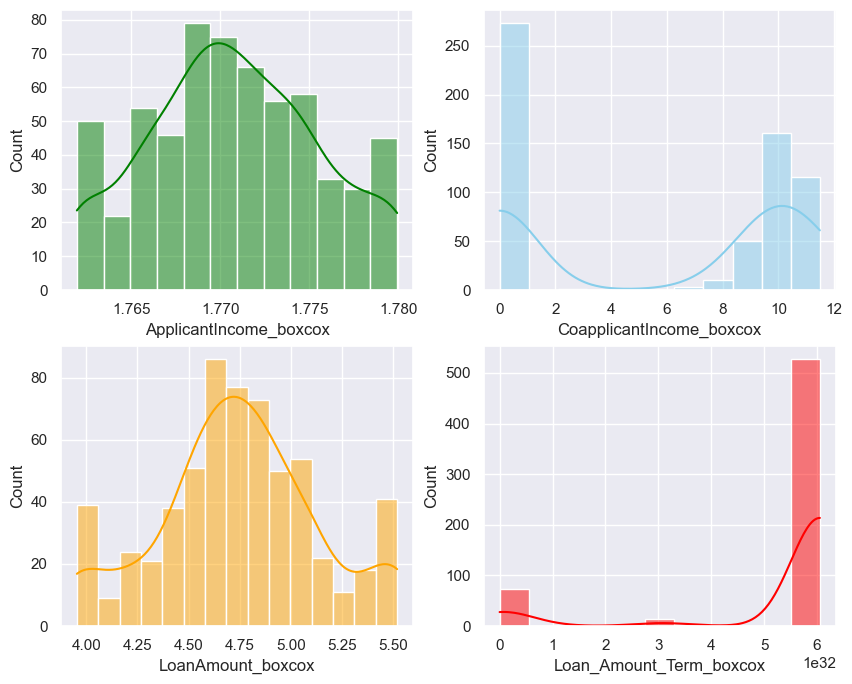

In [73]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome_boxcox", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome_boxcox", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount_boxcox", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term_boxcox", kde=True, ax=axs[1, 1], color='red')

In [74]:
df_model

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_en,Loan_Amount_Term_en,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,Loan_Amount_Term_scaled,ApplicantIncome_boxcox,CoapplicantIncome_boxcox,LoanAmount_boxcox,Loan_Amount_Term_boxcox
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,...,0.095581,0.358325,0.295005,-0.897719,0.095581,0.358325,1.774341,0.000000,4.858550,6.051101e+32
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,...,-0.214209,0.358325,-0.104186,0.076762,-0.214209,0.358325,1.772296,9.450524,4.732170,6.051101e+32
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,...,-1.257375,0.358325,-0.603332,-0.897719,-1.257375,0.358325,1.768009,0.000000,4.108916,6.051101e+32
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,...,-0.348811,0.358325,-0.734819,0.626038,-0.348811,0.358325,1.766236,10.191670,4.671460,6.051101e+32
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,...,0.004520,0.358325,0.342618,-0.897719,0.004520,0.358325,1.774539,0.000000,4.823137,6.051101e+32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,...,-1.173249,0.358325,-0.634864,-0.897719,-1.173249,0.358325,1.767620,0.000000,4.177608,6.051101e+32
610,1,1,3,0,0,4106,0.0,56.000000,180.0,1,...,-1.425628,-3.058007,-0.254592,-0.897719,-1.425628,-3.058007,1.771280,0.000000,3.954445,6.413229e+28
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,...,1.888949,0.358325,0.995954,-0.742629,1.888949,0.358325,1.776647,6.630083,5.372028,6.051101e+32
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,...,0.778482,0.358325,0.841764,-0.897719,0.778482,0.358325,1.776231,0.000000,5.088451,6.051101e+32


⭐ The log method seems to work than square root. It appears to be more effective in normalizing the distributions of ApplicantIncome, CoapplicantIncome, and LoanAmount. 

In [75]:
df_model['ApplicantIncome'] = np.log(df_model.ApplicantIncome + 1)
df_model['CoapplicantIncome'] = np.log(df_model.CoapplicantIncome + 1)
df_model['LoanAmount'] = np.log(df_model.LoanAmount + 1)
df_model['Loan_Amount_Term'] = np.log(df_model.Loan_Amount_Term + 1)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

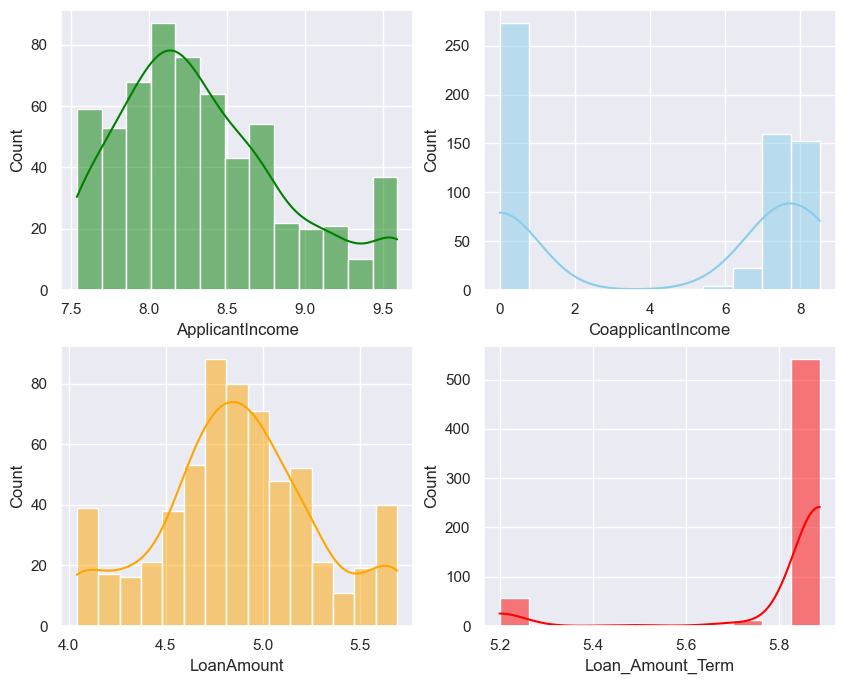

In [76]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_model, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_model, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_model, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_model, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red')

### Define features and target variable

In [77]:
df_model = df_model.drop(['ApplicantIncome_sqrt', 'CoapplicantIncome_sqrt', 'LoanAmount_sqrt',
       'Loan_Amount_Term_sqrt', 'ApplicantIncome_log', 'CoapplicantIncome_log',
       'LoanAmount_log', 'Loan_Amount_Term_log', 'ApplicantIncome_en',
       'CoapplicantIncome_en', 'LoanAmount_en', 'Loan_Amount_Term_en',
       'ApplicantIncome_scaled', 'CoapplicantIncome_scaled',
       'LoanAmount_scaled', 'Loan_Amount_Term_scaled',
       'ApplicantIncome_boxcox', 'CoapplicantIncome_boxcox',
       'LoanAmount_boxcox', 'Loan_Amount_Term_boxcox'], axis= 1)

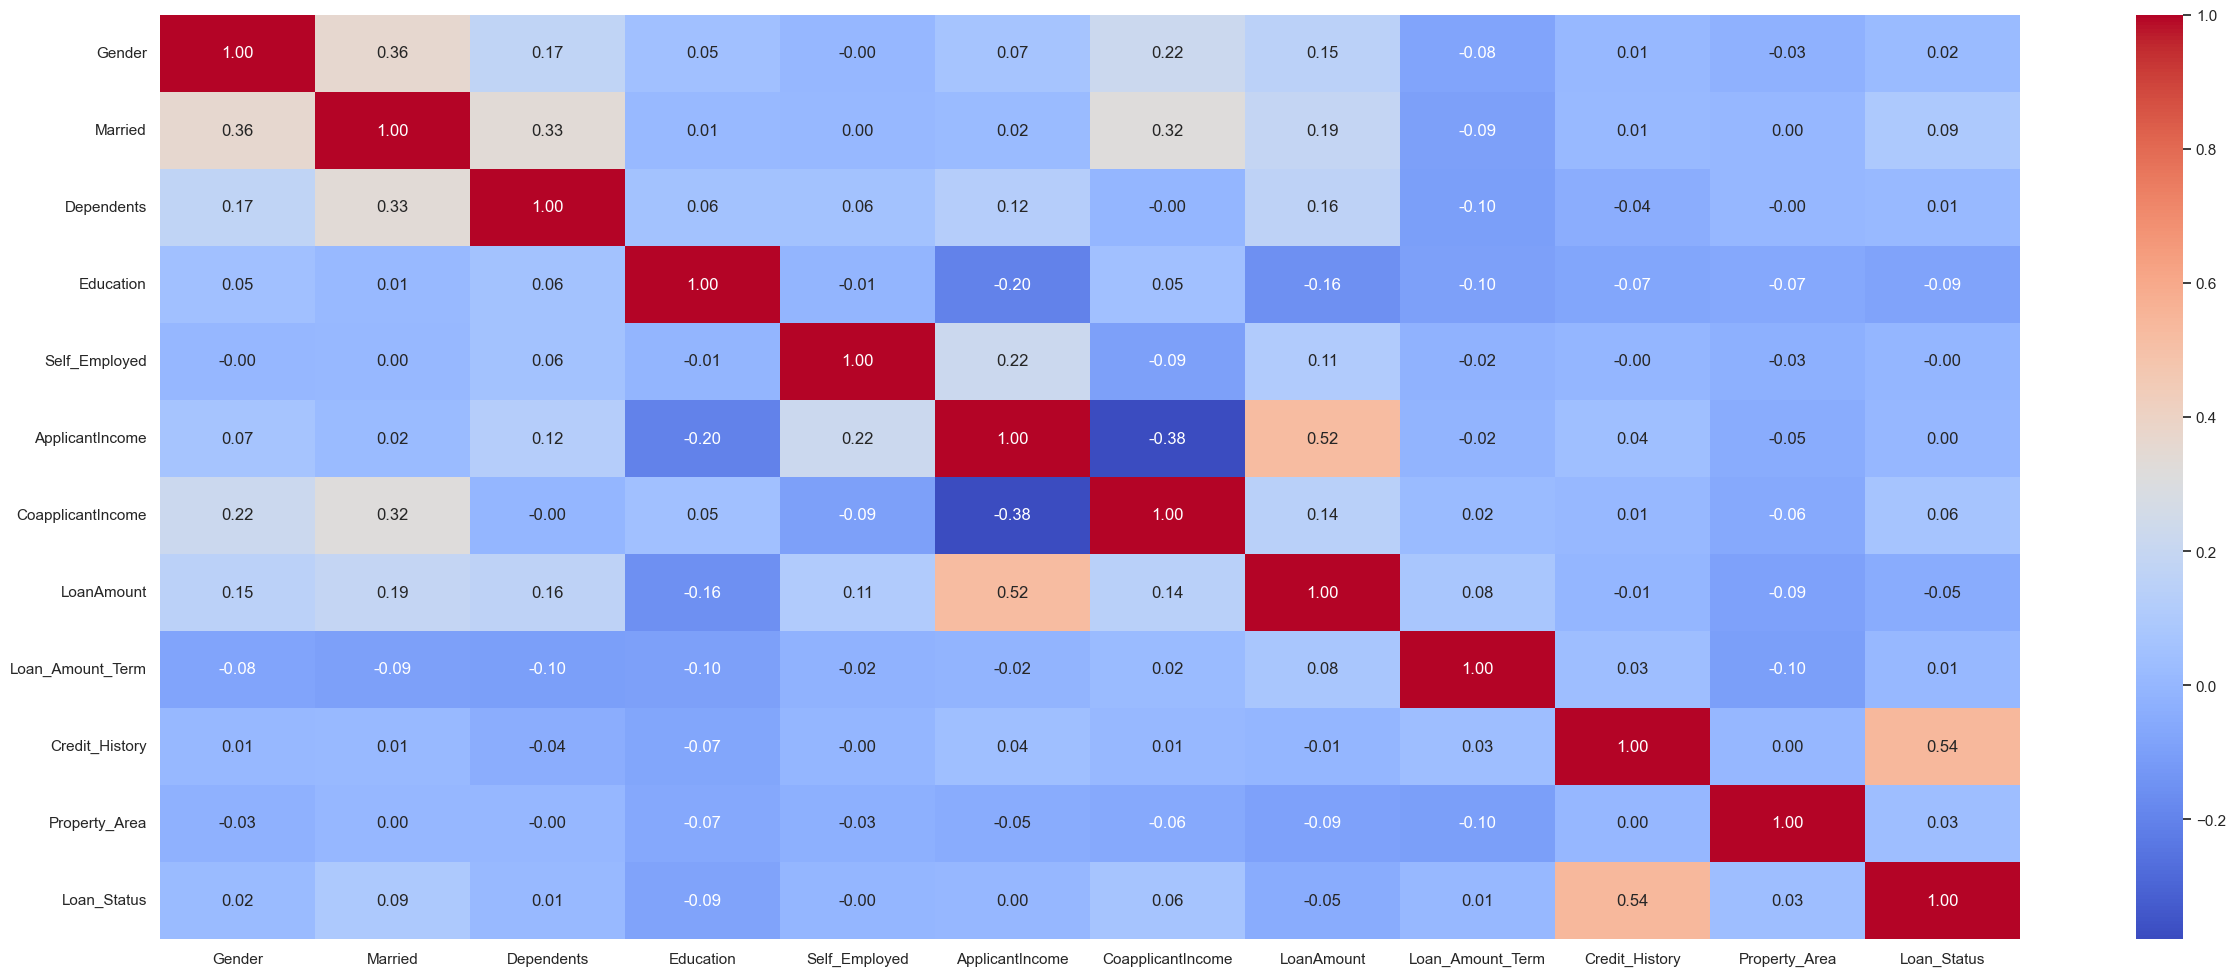

In [78]:
plt.figure(figsize= (30, 12))
sns.heatmap(data= df_model.corr(), annot= True, cmap= 'coolwarm', fmt= ".2f")
plt.show()

To train model, I should separate the data

In [79]:
df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [80]:
X = df_model.drop(['Loan_Status'], axis= 1)

In [81]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674197,0.000000,4.993232,5.888878,1,2
1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,1,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,1,2
3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,1,2
4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,1,2


In [82]:
y = df_model['Loan_Status']

In [83]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, test_size= 0.2)

## Models

#### Logistic Regression

In [86]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [87]:
logreg = LogisticRegression(random_state= 0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [88]:
logreg_pred = logreg.predict(X_test)

In [89]:
logreg_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [90]:
LOGACC = accuracy_score(y_test, logreg_pred)
print('LR accuracy: {:.2f}%'.format(LOGACC*100))

NameError: name 'accuracy_score' is not defined

In [311]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, logreg_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[14 19]
 [ 2 88]]


In [312]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, logreg_pred)
print(f'Precision: {precision:.2f}')

Precision: 0.82


In [270]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, logreg_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.98


In [271]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, logreg_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.89


In [272]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

[[14 19]
 [ 2 88]]


#### Decision Tree

In [96]:
from sklearn import tree

In [97]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
clf_pred = clf.predict(X_test)

In [99]:
clf_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

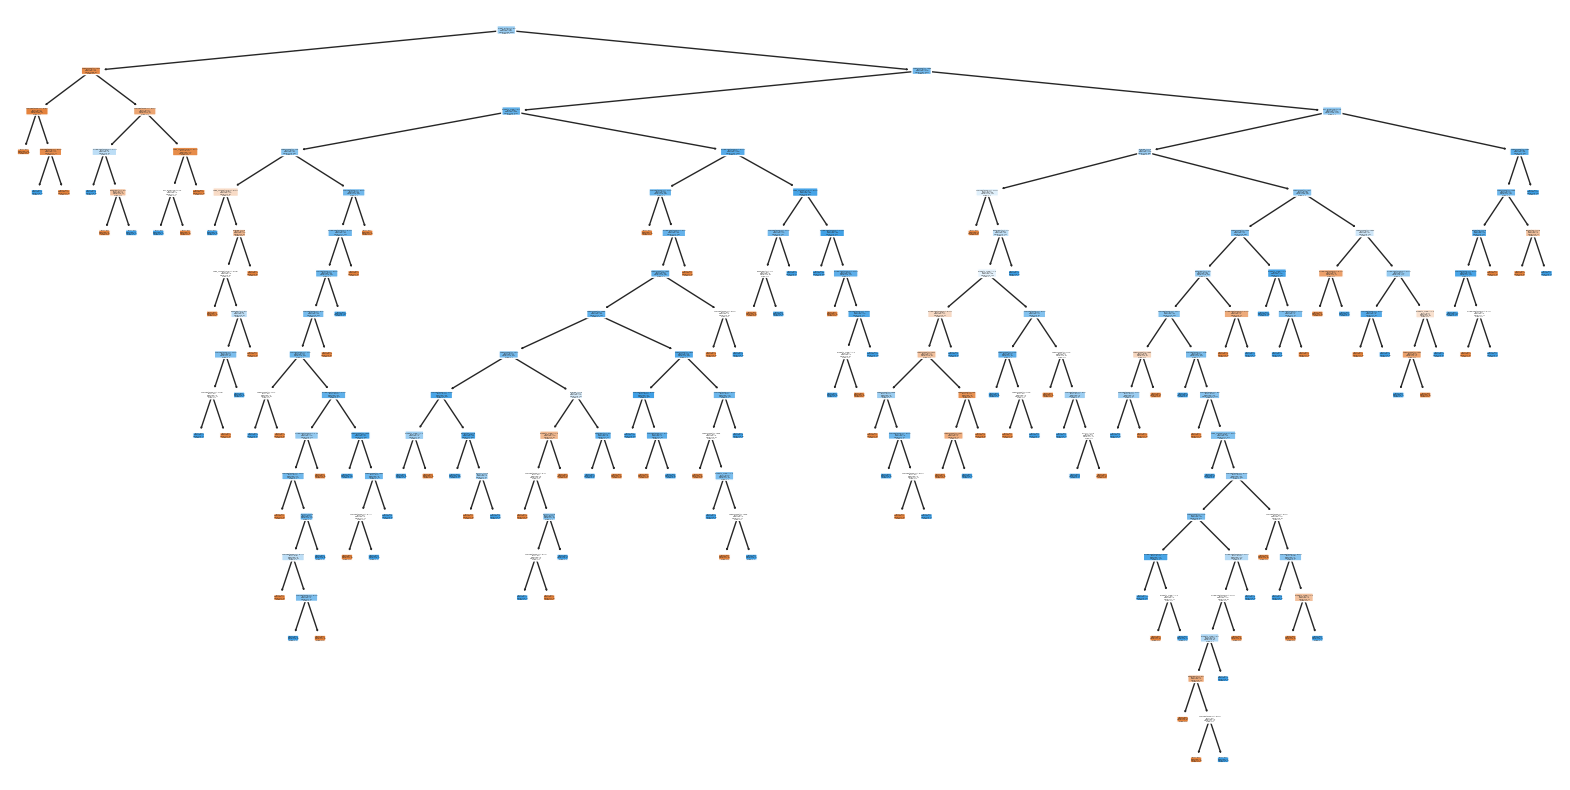

In [100]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

In [101]:
from sklearn.metrics import accuracy_score
DTACC = accuracy_score(clf_pred,y_test)
print('LR accuracy: {:.2f}%'.format(DTACC*100))

LR accuracy: 69.92%


In [102]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, clf_pred))
print(confusion_matrix(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.45      0.61      0.52        33
           1       0.84      0.73      0.78        90

    accuracy                           0.70       123
   macro avg       0.64      0.67      0.65       123
weighted avg       0.73      0.70      0.71       123

[[20 13]
 [24 66]]


#### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [105]:
rf_pred = rf.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
RFACC = accuracy_score(rf_pred,y_test)
print('LR accuracy: {:.2f}%'.format(RFACC*100))

LR accuracy: 82.93%


In [107]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

[[14 19]
 [ 2 88]]


#### Gaussian Naive Bayes

In [108]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

In [141]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

[[14 19]
 [ 2 88]]
Categorical Naive Bayes accuracy: 82.93%


In [110]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

[[14 19]
 [ 2 88]]
Gaussian Naive Bayes accuracy: 82.93%


## Model Comparison 

In [111]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Categorical NB', 'Gaussian NB'],
                        'Accuracy': [LOGACC*100, DTACC*100, RFACC*100, 
                                     NBAcc1*100, NBAcc2*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.926829
2,Random Forest,82.926829
3,Categorical NB,82.926829
4,Gaussian NB,82.926829
1,Decision Tree,69.918699


## Apply model

#### Data manipulation

In [112]:
df_test = pd.read_csv('C:\Prem\Projects\Python\Python test\dataset\loan-test.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24492\3339617656.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_test = pd.read_csv('C:\Prem\Projects\Python\Python test\dataset\loan-test.csv')


In [113]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [115]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [116]:
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace= True)
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace= True)
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace= True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24492\3040235793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24492\3040235793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [117]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

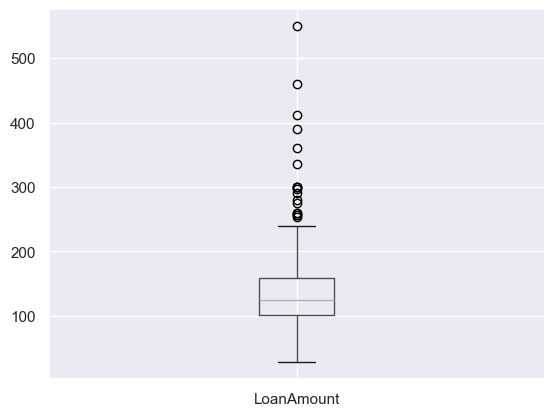

In [118]:
df_test.boxplot(column= 'LoanAmount')
plt.show()

In [119]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace= True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(), inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24492\3959733471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24492\3959733471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

#### Encode

In [120]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_test['Gender'] = lbl.fit_transform(df_test['Gender'])
df_test['Married'] = lbl.fit_transform(df_test['Married'])
df_test['Dependents'] = lbl.fit_transform(df_test['Dependents'])
df_test['Education'] = lbl.fit_transform(df_test['Education'])
df_test['Self_Employed'] = lbl.fit_transform(df_test['Self_Employed'])
df_test['Credit_History'] = lbl.fit_transform(df_test['Credit_History'])
df_test['Property_Area'] = lbl.fit_transform(df_test['Property_Area'])

In [121]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1,0


In [122]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [123]:
df_test['ApplicantIncome'] = np.log(df_test.ApplicantIncome + 1)
df_test['CoapplicantIncome'] = np.log(df_test.CoapplicantIncome + 1)
df_test['LoanAmount'] = np.log(df_test.LoanAmount + 1)
df_test['Loan_Amount_Term'] = np.log(df_test.Loan_Amount_Term + 1)

#### fit model

In [124]:
test = df_test.drop(['Loan_ID'], axis= 1)

In [126]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [127]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [136]:
pred_test = logreg.predict(test)

In [137]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_pred = rf.predict(test)

In [139]:
rf_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [170]:
# Inverse the log transformation
df_test['ApplicantIncome'] = np.exp(df_test['ApplicantIncome']) - 1
df_test['CoapplicantIncome'] = np.exp(df_test['CoapplicantIncome']) - 1
df_test['LoanAmount'] = np.exp(df_test['LoanAmount']) - 1
df_test['Loan_Amount_Term'] = np.exp(df_test['Loan_Amount_Term']) - 1

In [172]:
df_test['Pred_Loan_Status'] = pred_test

In [173]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
0,LP001015,1,1,0,0,0,5720.0,0.0,110.0,360.0,1,2,1
1,LP001022,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1,2,1
2,LP001031,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1,2,1
3,LP001035,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1,2,1
4,LP001051,1,0,0,1,0,3276.0,0.0,78.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009.0,1777.0,113.0,360.0,1,2,1
363,LP002975,1,1,0,0,0,4158.0,709.0,115.0,360.0,1,2,1
364,LP002980,1,0,0,0,0,3250.0,1993.0,126.0,360.0,1,1,1
365,LP002986,1,1,0,0,0,5000.0,2393.0,158.0,360.0,1,0,1


In [174]:
df_test['Pred_Loan_Status'].value_counts()

Pred_Loan_Status
1    307
0     60
Name: count, dtype: int64